# HR Analytics - Homework 1 - Employee Satisfaction Survey

Below you can find the analysis I made and the comments about the analysis. I will share coments and insights about an analysis and then provide plots or tables relevant to that analysis. Note: This jupyter notebook is using R.

First, lets look at the dataset before starting our reliability analysis.

In [1]:
setwd('/Users/leventkayin/Desktop/School/HR Analytics/Homework1')

mydata = read.csv2('Survey.csv',sep = ',')

dropList <- c("MyRole_Q10", "MyRole_Q11", "RasManagement_Q14", "RasManagement_Q15", "WorkEnvironment_Q14", "WorkEnvironment_Q15", "Communication_Q8", "Communication_Q9", "ToolsResourcesAndProcesses_Q10", "ToolsResourcesAndProcesses_Q11", "OverallSatisfaction_Q6","MyRole_Q9", "RasManagement_Q13", "WorkEnvironment_Q10", "Communication_Q7", "ToolsResourcesAndProcesses_Q4","TrainingNeeds_Q9")

reliability_data <- mydata[, !colnames(mydata) %in% dropList]

employees = mydata[,colnames(mydata)%in%c("ID","Division","RAS","pctinvalid","Team","Rank","Title","EducLv","Age","Sex","EthnicGrp","Citizenship","YearsofService")]

head(reliability_data,5)

ID,Division,RAS,RASdesc,pctinvalid,Team,Rank,Title,EducLv,Age,⋯,ToolsResourcesAndProcesses_Q5,ToolsResourcesAndProcesses_Q6,ToolsResourcesAndProcesses_Q7,ToolsResourcesAndProcesses_Q8,ToolsResourcesAndProcesses_Q9,OverallSatisfaction_Q1,OverallSatisfaction_Q2,OverallSatisfaction_Q3,OverallSatisfaction_Q4,OverallSatisfaction_Q5
1,5,9,Yerkes,8.75,1,2,"Research Admin, Pre-Award II",1,61.40000153,⋯,5,5,5,5,5,5,5,5,5,5
2,2,1,"Anesthesiology, Brain Health, Orthopaedics, and Surgical Services",7.5,1,3,"Research Admin, Pre-Award III",4,50.5,⋯,5,5,3,5,4,4,4,4,5,3
3,2,2,Basic Sciences,10,1,3,"Research Admin, Post Award III",2,62,⋯,2,2,1,1,4,2,2,3,2,2
4,2,1,"Anesthesiology, Brain Health, Orthopaedics, and Surgical Services",6.25,1,7,"Research Admin, Pre-Award Mgr",2,58,⋯,2,2,2,2,4,3,3,3,3,3
5,2,1,"Anesthesiology, Brain Health, Orthopaedics, and Surgical Services",7.5,1,2,"Research Admin, Pre-Award II",2,61.70000076,⋯,5,5,4,5,5,4,4,5,5,4


Some data manupilation where we seperate questions by topic:

In [2]:
library(data.table)

myrole = reliability_data[colnames(reliability_data) %like% "MyRole"]
rasmanagement = reliability_data[colnames(reliability_data) %like% "RasManagement"]
workenvironment = reliability_data[colnames(reliability_data) %like% "WorkEnvironment"]
communication = reliability_data[colnames(reliability_data) %like% "Communication"]
training = reliability_data[colnames(reliability_data) %like% "Training_"]
trainingneeds = reliability_data[colnames(reliability_data) %like% "TrainingNeeds"]
trs = reliability_data[colnames(reliability_data) %like% "ToolsResourcesAndProcesses"]
satisfaction = reliability_data[colnames(reliability_data) %like% "OverallSatisfaction"]

factors_data = cbind(myrole,rasmanagement,workenvironment,communication,training,trainingneeds,trs)

## Reliability Analysis

As seen on the below plots only the Training and Training Needs questions exhibit low reliability. Other questions show either good(~0.8) or excellent (~0.9) reliability.

Warning message in psych::alpha(rasmanagement, check.keys = TRUE):
“Some items were negatively correlated with total scale and were automatically reversed.
 This is indicated by a negative sign for the variable name.”

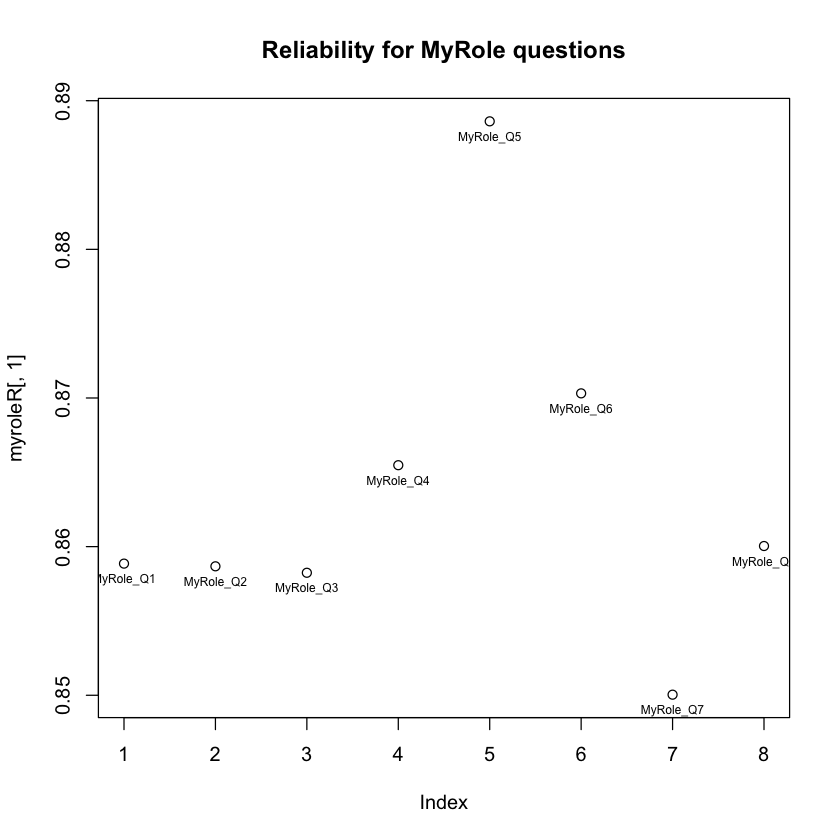

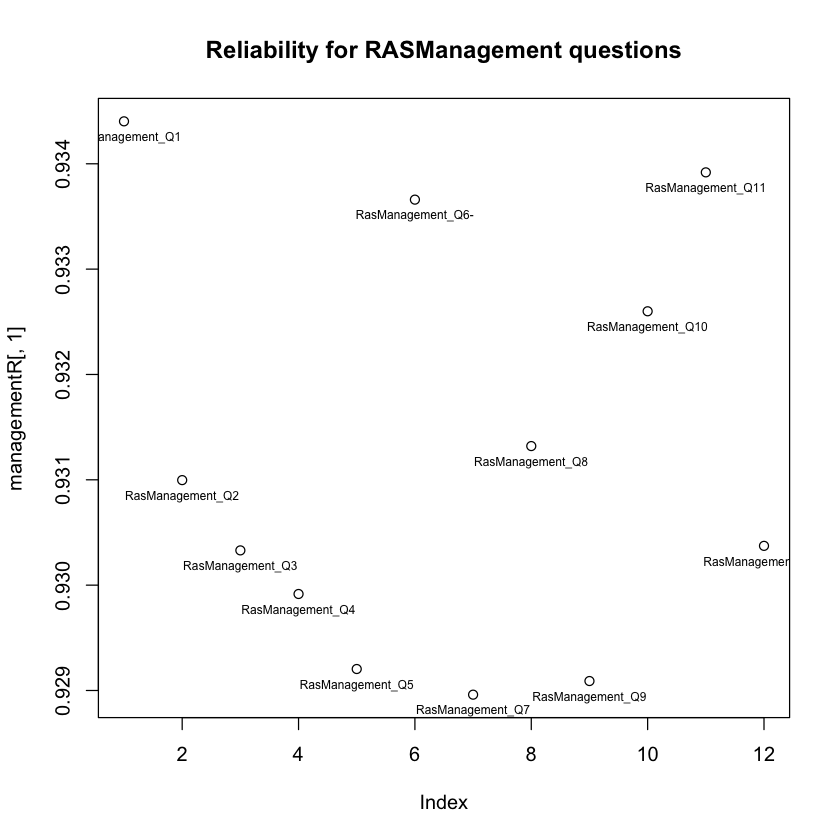

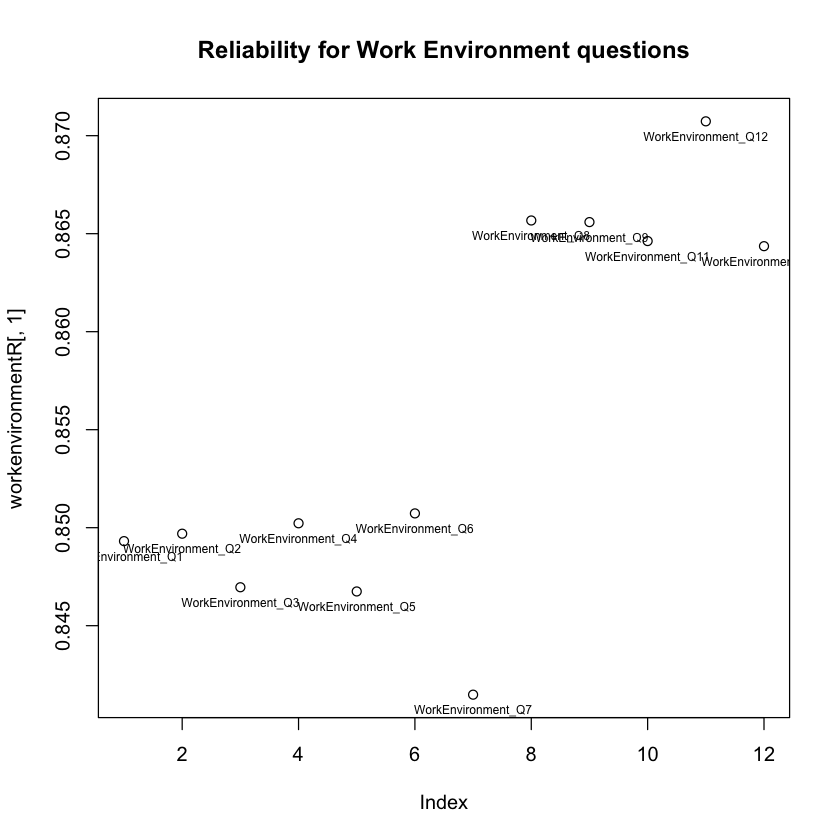

Warning message in psych::alpha(training, check.keys = TRUE):
“Some items were negatively correlated with total scale and were automatically reversed.
 This is indicated by a negative sign for the variable name.”

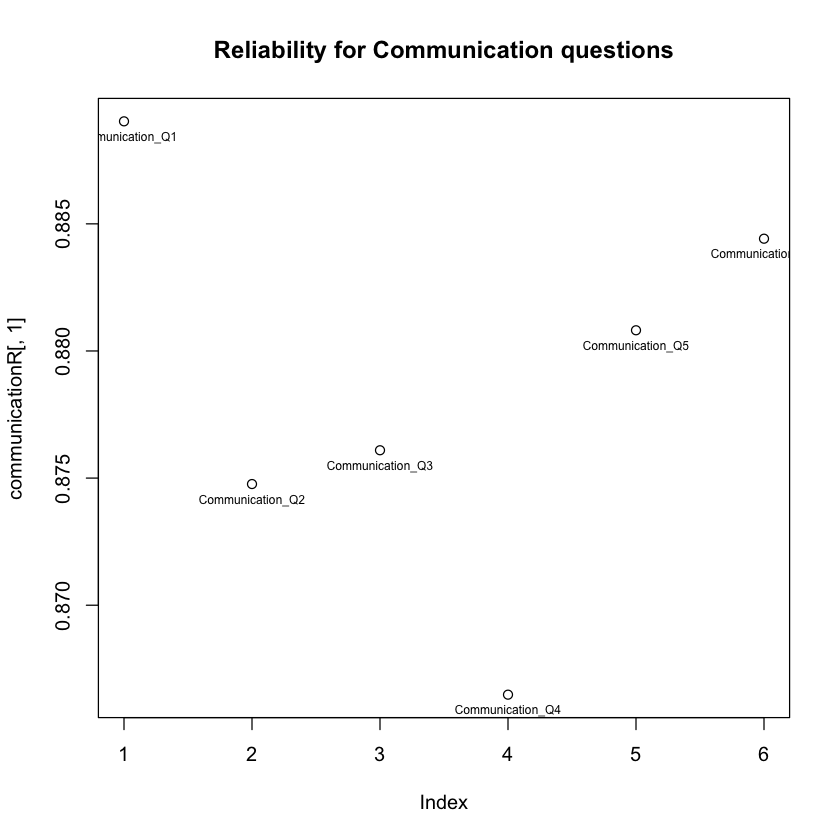

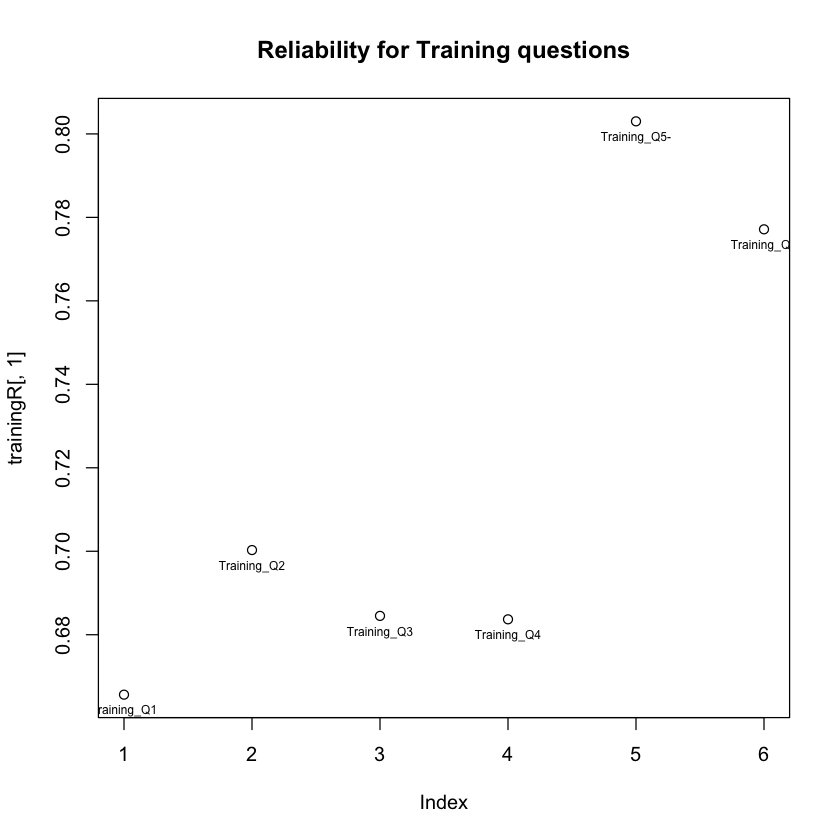

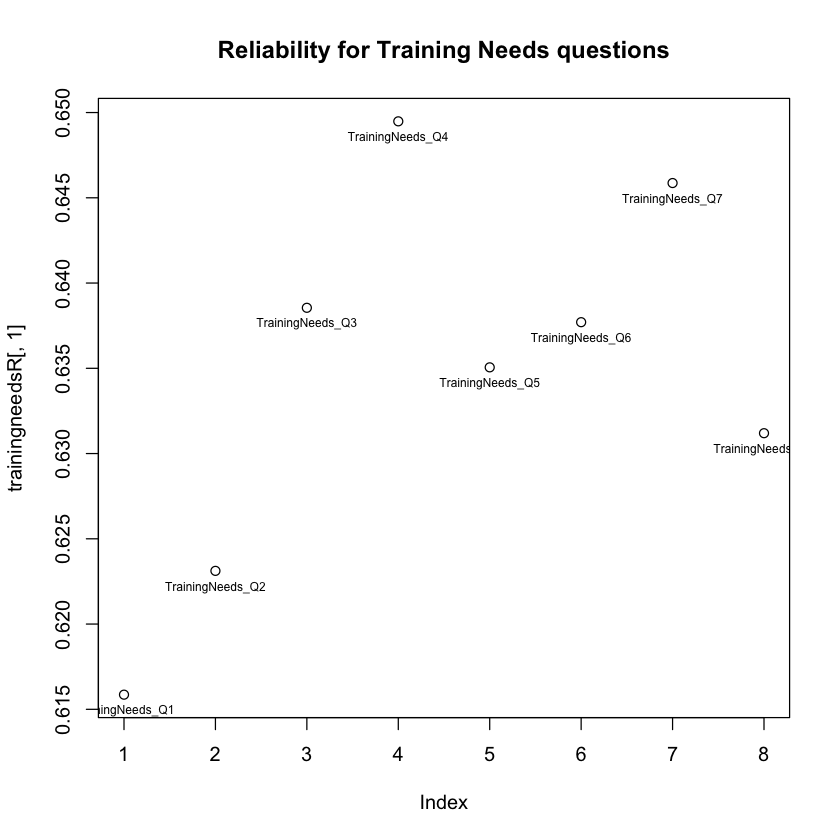

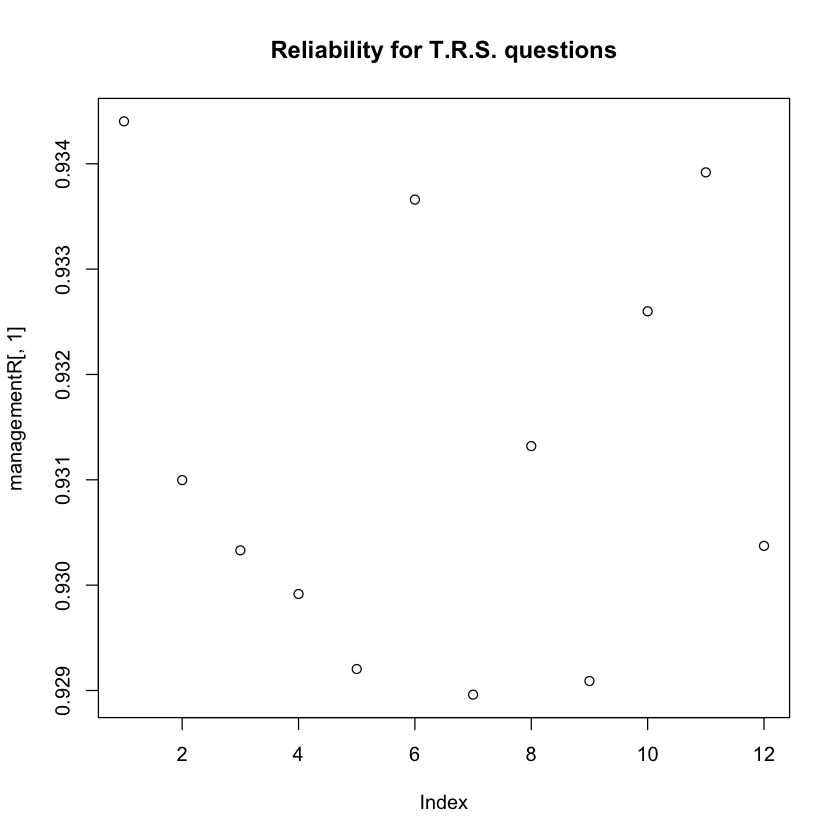

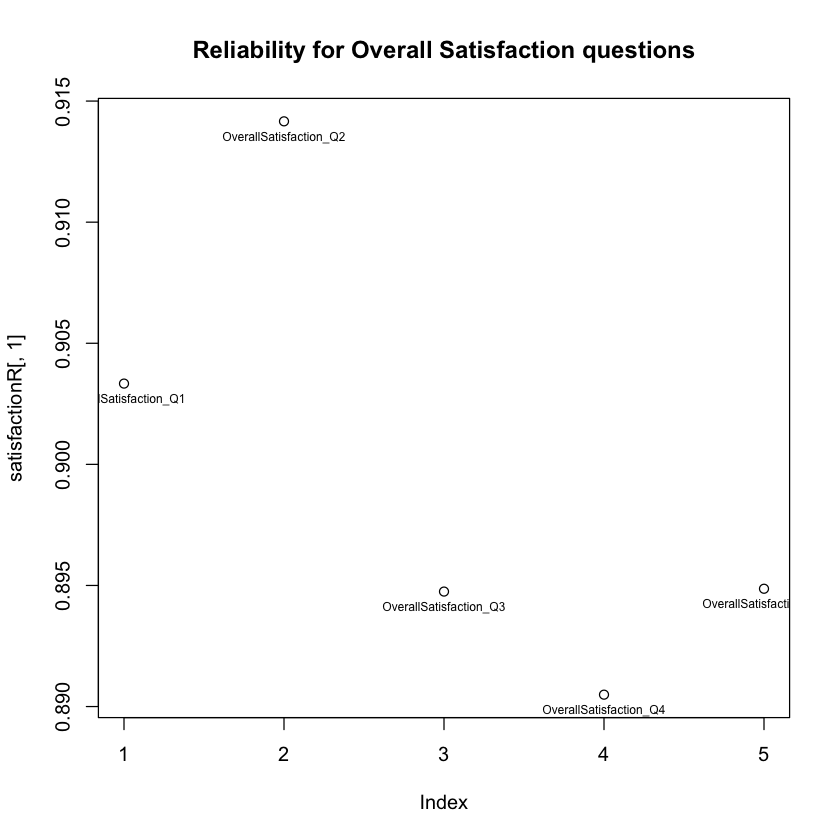

In [3]:
library(psych)

myrole_r = psych::alpha(myrole,check.keys = TRUE)
myroleR = as.data.frame(myrole_r[2])
plot(myroleR[,1])
text(myroleR[,1],rownames(myroleR),cex=0.6,pos = 1)
title('Reliability for MyRole questions')

management_r = psych::alpha(rasmanagement,check.keys = TRUE)
managementR = as.data.frame(management_r[2])
plot(managementR[,1])
text(managementR[,1],rownames(managementR),cex=0.6,pos = 1)
title('Reliability for RASManagement questions')

workenvironment_r = psych::alpha(workenvironment,check.keys = TRUE)
workenvironmentR = as.data.frame(workenvironment_r[2])
plot(workenvironmentR[,1])
text(workenvironmentR[,1],rownames(workenvironmentR),cex=0.6,pos = 1)
title('Reliability for Work Environment questions')

communication_r = psych::alpha(communication,check.keys = TRUE)
communicationR = as.data.frame(communication_r[2])
plot(communicationR[,1])
text(communicationR[,1],rownames(communicationR),cex=0.6,pos = 1)
title('Reliability for Communication questions')

training_r = psych::alpha(training,check.keys = TRUE)
trainingR = as.data.frame(training_r[2])
plot(trainingR[,1])
text(trainingR[,1],rownames(trainingR),cex=0.6,pos = 1)
title('Reliability for Training questions')

trainingneeds_r = psych::alpha(trainingneeds,check.keys = TRUE)
trainingneedsR = as.data.frame(trainingneeds_r[2])
plot(trainingneedsR[,1])
text(trainingneedsR[,1],rownames(trainingneedsR),cex=0.6,pos = 1)
title('Reliability for Training Needs questions')

trs_r = psych::alpha(trs,check.keys = TRUE)
trsR = as.data.frame(trs_r[2])
plot(managementR[,1])
text(trsR[,1],rownames(trsR),cex=0.6,pos = 1)
title('Reliability for T.R.S. questions')

satisfaction_r = psych::alpha(satisfaction,check.keys = TRUE)
satisfactionR = as.data.frame(satisfaction_r[2])
plot(satisfactionR[,1])
text(satisfactionR[,1],rownames(satisfactionR),cex=0.6,pos = 1)
title('Reliability for Overall Satisfaction questions')

## Principle Components Analysis

Below we can see that around 11 factors the "fit" starts to plateau. So, I will use 11 factors and see what makes sense and eliminate unneccessary factors to get our final number of factors (turns out to be 6)

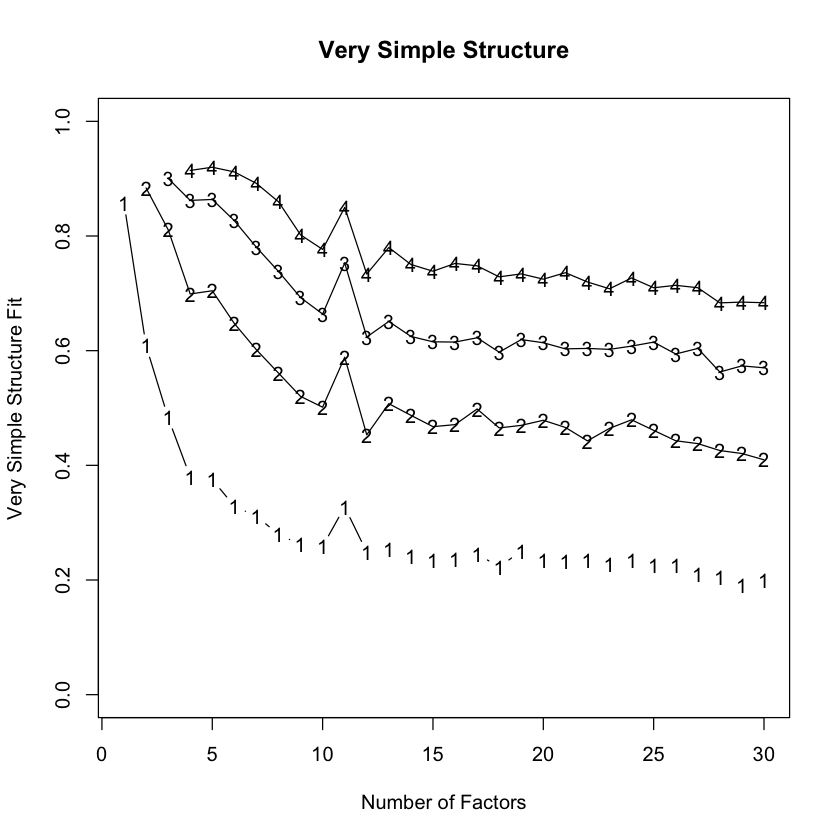

In [4]:
library(GPArotation)

HowManyFactors = vss(factors_data,n=30,rotate = "varimax",fm="mle")

In [5]:
factors =fa(factors_data,11,rotate = "varimax")
factorsl = factors$loadings

print(factorsl,cutoff=0.56)


Loadings:
                              MR1    MR2    MR3    MR5    MR6    MR7    MR4   
MyRole_Q1                      0.565                                          
MyRole_Q2                      0.610                                          
MyRole_Q3                      0.715                                          
MyRole_Q4                                                                     
MyRole_Q5                                                                     
MyRole_Q6                                    0.714                            
MyRole_Q7                      0.610                                          
MyRole_Q8                                                                     
RasManagement_Q1               0.608                                          
RasManagement_Q2               0.748                                          
RasManagement_Q3               0.821                                          
RasManagement_Q4               0.789     

## Creating the Factors

We can identify 6 factors from the analysis above.

1) Being valued and job understanding

2) Effective communication

3) Stress level

4) Training

5) Respect from superiors

6) Work satisfaction (meaning and challenge)

(See factors attached to the data table below)

In [6]:
attach(factors_data)

factor1 = rowMeans(cbind(MyRole_Q1,MyRole_Q2,MyRole_Q3,MyRole_Q7,RasManagement_Q1,RasManagement_Q2,RasManagement_Q3,RasManagement_Q4,RasManagement_Q5,RasManagement_Q6,RasManagement_Q7,RasManagement_Q12,WorkEnvironment_Q1,Communication_Q1))

factor2 = rowMeans(cbind(WorkEnvironment_Q9,Communication_Q2,Communication_Q4,Communication_Q5,Communication_Q6,ToolsResourcesAndProcesses_Q3))

factor3 = rowMeans(cbind(MyRole_Q6,ToolsResourcesAndProcesses_Q5,ToolsResourcesAndProcesses_Q6,ToolsResourcesAndProcesses_Q7))

factor4 = rowMeans(cbind(Training_Q1,Training_Q2,Training_Q3,Training_Q4))

factor5 = rowMeans(cbind(WorkEnvironment_Q11,WorkEnvironment_Q12))

factor6 = rowMeans(cbind(MyRole_Q4,MyRole_Q5))

detach(factors_data)

factoroverall = rowMeans(cbind(factor1,factor2,factor3,factor4,factor5,factor6))

indexed_data = cbind(reliability_data,factor1,factor2,factor3,factor4,factor5,factor6,factoroverall)

savefile = as.data.frame(indexed_data)

write.table(x = savefile,file = "indexed_RAS_data.csv",sep = ",",row.names = FALSE)

head(indexed_data)

ID,Division,RAS,RASdesc,pctinvalid,Team,Rank,Title,EducLv,Age,⋯,OverallSatisfaction_Q3,OverallSatisfaction_Q4,OverallSatisfaction_Q5,factor1,factor2,factor3,factor4,factor5,factor6,factoroverall
1,5,9,Yerkes,8.75,1,2,"Research Admin, Pre-Award II",1,61.40000153,⋯,5,5,5,4.714286,5.000000,4.75,4.25,5.0,5.0,4.785714
2,2,1,"Anesthesiology, Brain Health, Orthopaedics, and Surgical Services",7.5,1,3,"Research Admin, Pre-Award III",4,50.5,⋯,4,5,3,4.428571,4.166667,4.25,5.00,4.0,4.5,4.390873
3,2,2,Basic Sciences,10,1,3,"Research Admin, Post Award III",2,62,⋯,3,2,2,2.785714,2.166667,1.75,3.00,4.5,4.5,3.117063
4,2,1,"Anesthesiology, Brain Health, Orthopaedics, and Surgical Services",6.25,1,7,"Research Admin, Pre-Award Mgr",2,58,⋯,3,3,3,3.785714,3.166667,2.00,4.50,1.0,3.0,2.908730
5,2,1,"Anesthesiology, Brain Health, Orthopaedics, and Surgical Services",7.5,1,2,"Research Admin, Pre-Award II",2,61.70000076,⋯,5,5,4,4.285714,2.833333,4.75,3.50,4.0,5.0,4.061508
6,3,8,Public Health and Nursing,5,1,3,"Research Admin, Post Award III",2,63.79999924,⋯,4,3,2,3.357143,3.000000,1.00,2.75,3.0,4.5,2.934524


## Exploration

We add age brackets for age and years of service.

In [7]:
indexed_data$AgeGroups = findInterval(indexed_data$Age, c(20,30,50))
indexed_data$YearsofServiceGroups = findInterval(indexed_data$YearsofService, c(20,40))
indexed = indexed_data

### Sex

We can see that Males are more satisfied compared to Females in general. However, one should keep populations sizes in mind when comparing

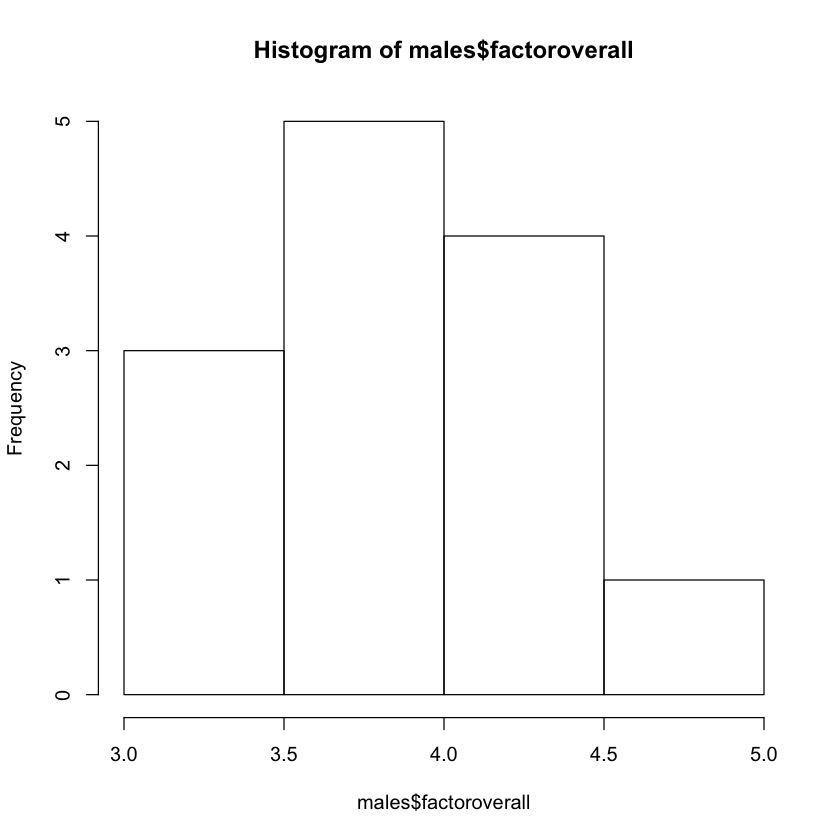

Warning message in mean.default(females$factoroveraall):
“argument is not numeric or logical: returning NA”

The mean Male satisfaction is: 3.953602 
The mean Female satisfaction is: NA 
First row is males secon is females


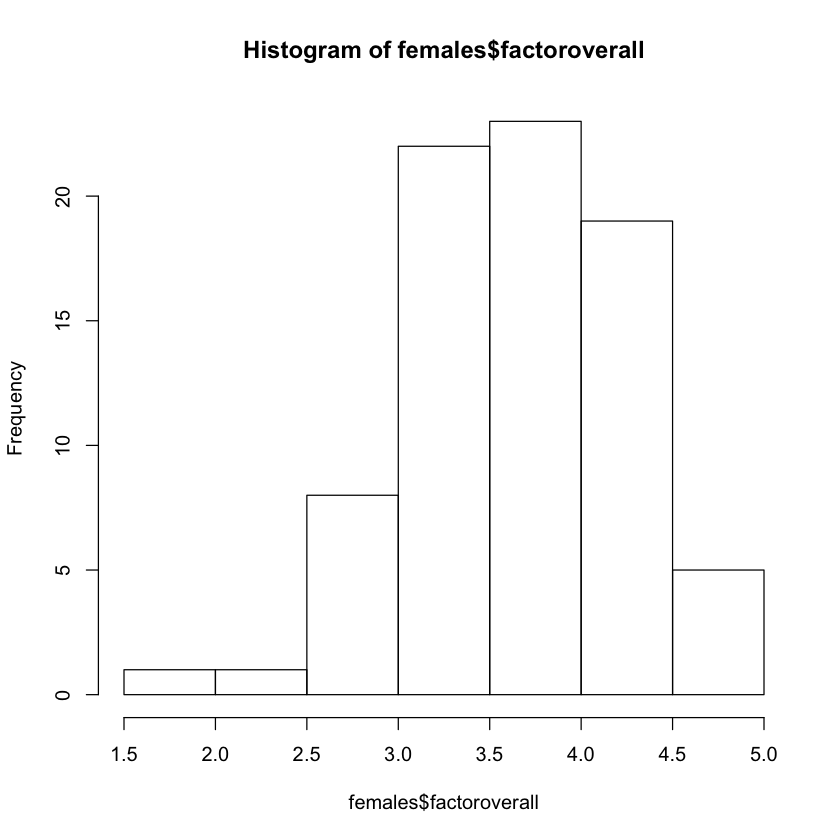

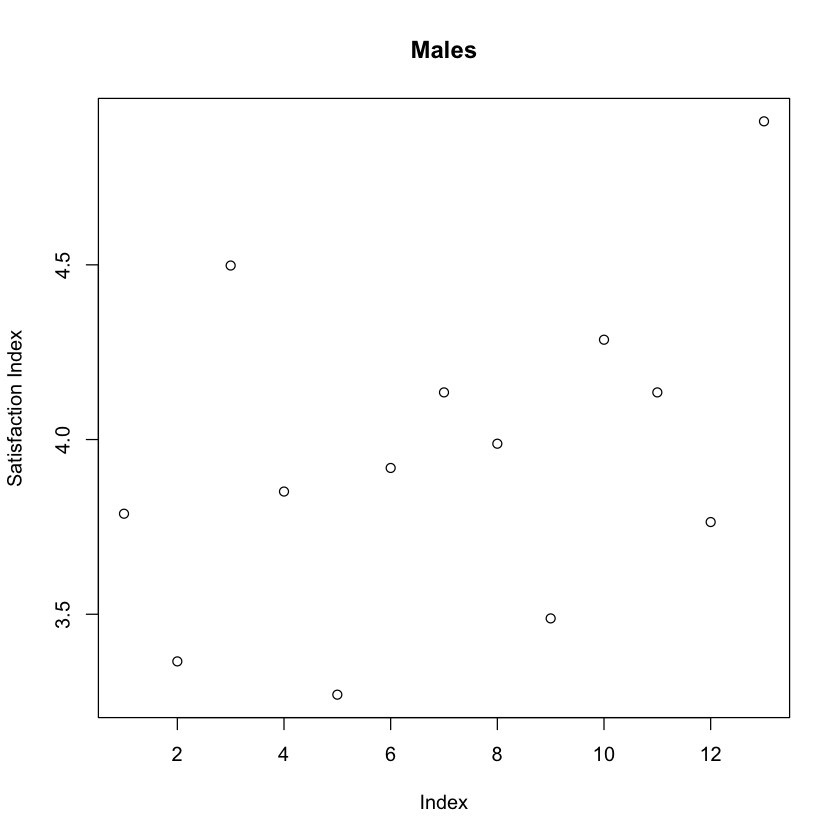

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
X1,1,13,3.953602,0.4560245,3.918651,3.928752,0.3206417,3.269841,4.910714,1.640873,0.3648682,-0.6360725,0.1264785
X11,1,79,3.656796,0.5780171,3.744048,3.673565,0.6589333,1.873016,4.785714,2.912698,-0.3721291,-0.1553466,0.0650320


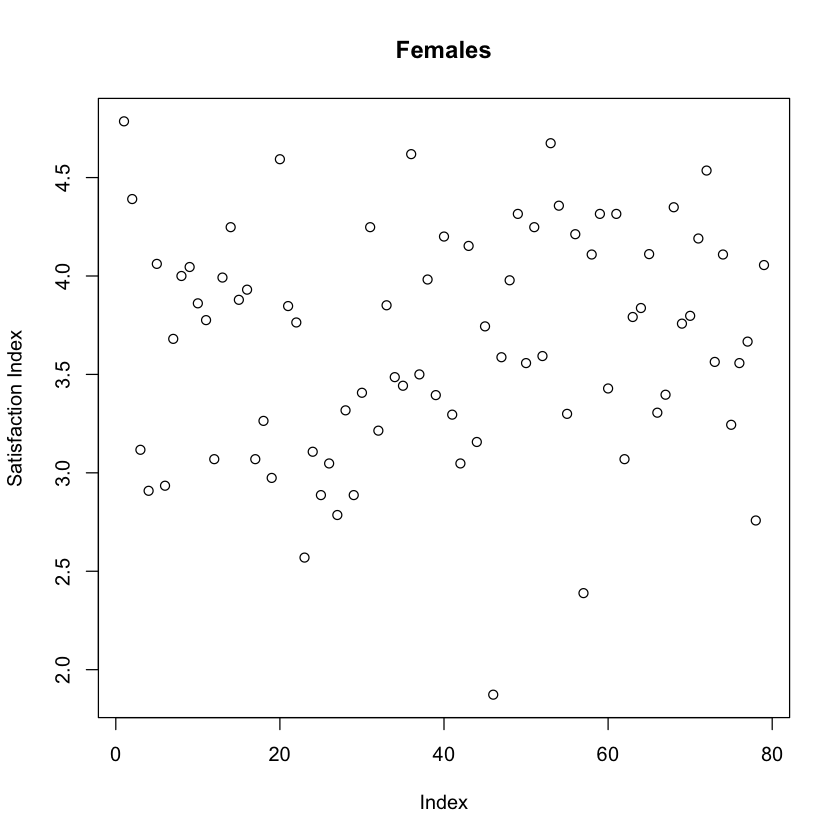

In [9]:
males   = subset(indexed_data,Sex == 0)
females = subset(indexed_data,Sex == 1)
hist(males$factoroverall)
hist(females$factoroverall)

cat("The mean Male satisfaction is:",mean(males$factoroverall),
    "\nThe mean Female satisfaction is:",mean(females$factoroveraall),"\nFirst row is males secon is females\n")

plot(males$factoroverall,ylab = "Satisfaction Index")
title("Males")
plot(females$factoroverall,ylab = "Satisfaction Index")
title("Females")

rbind(describe(males$factoroverall),describe(females$factoroverall))

### Ethnicity

We see that the first ethnic group is the least satisfied. Groups 2 and 3 are in similar satisfaction levels. However, Group 3 is more homogeneous compared to group 2.

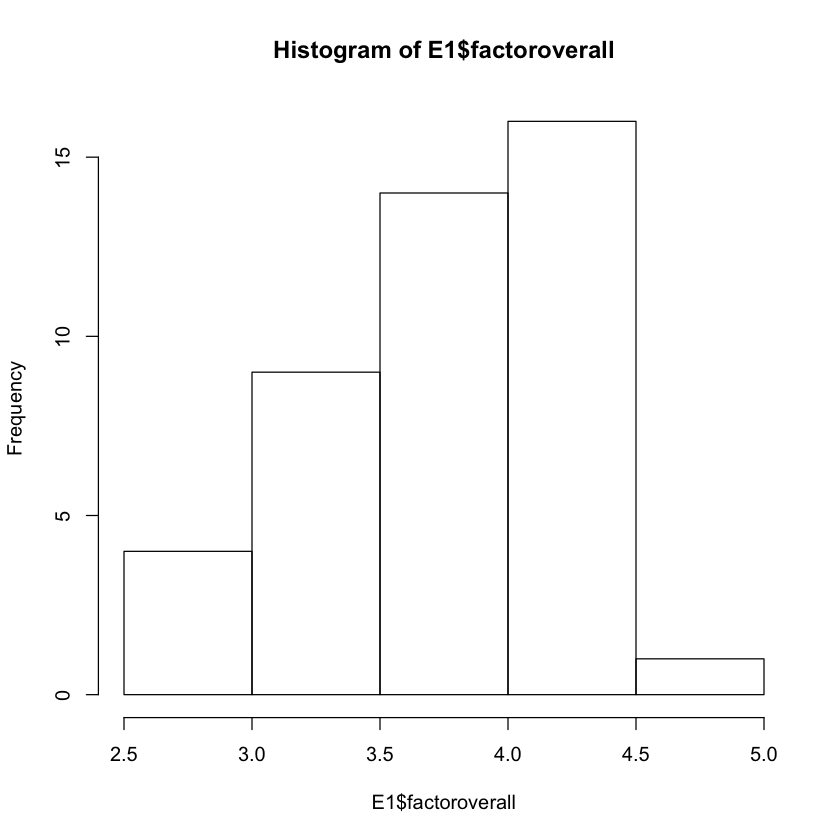

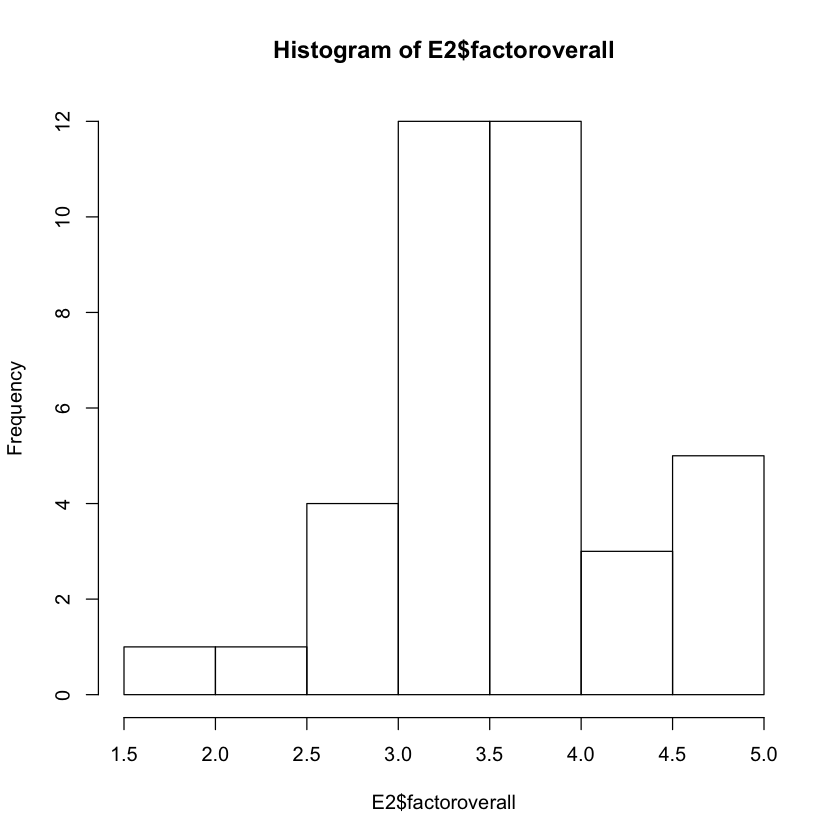

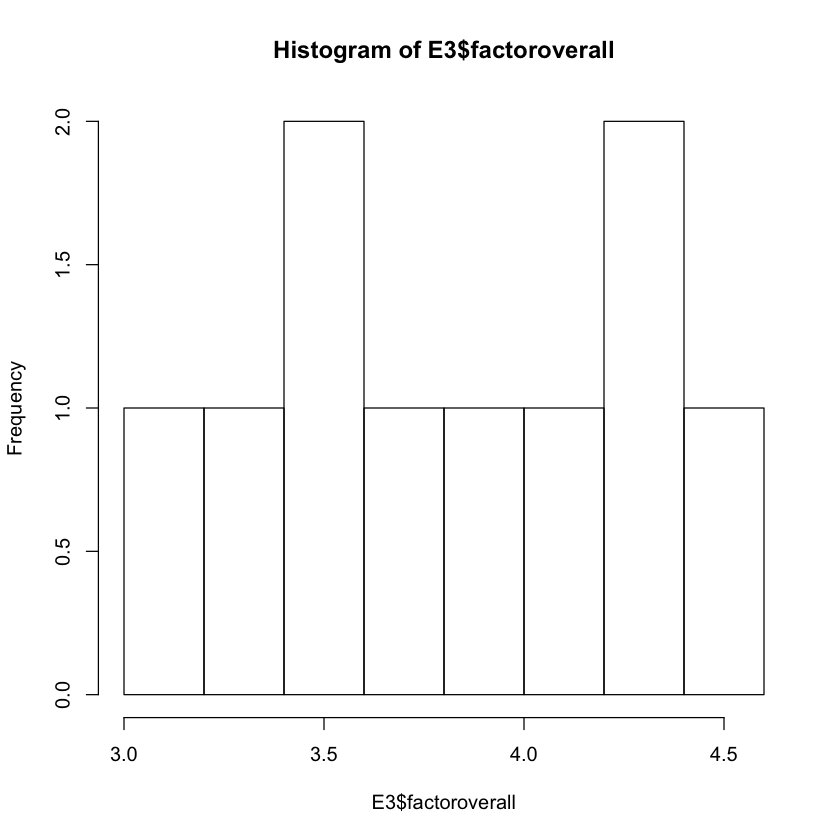

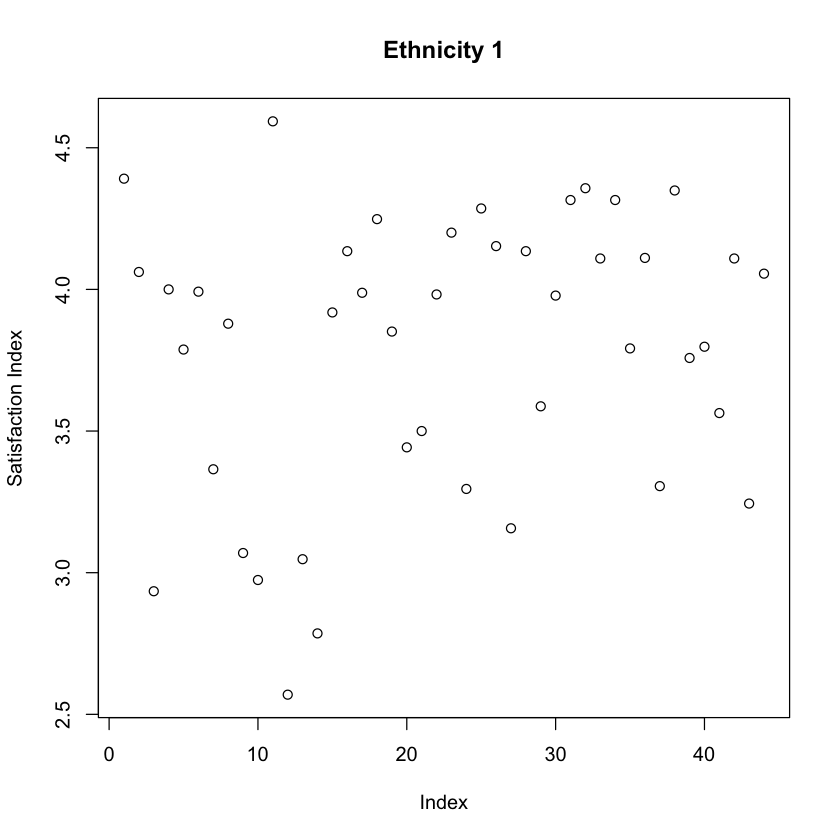

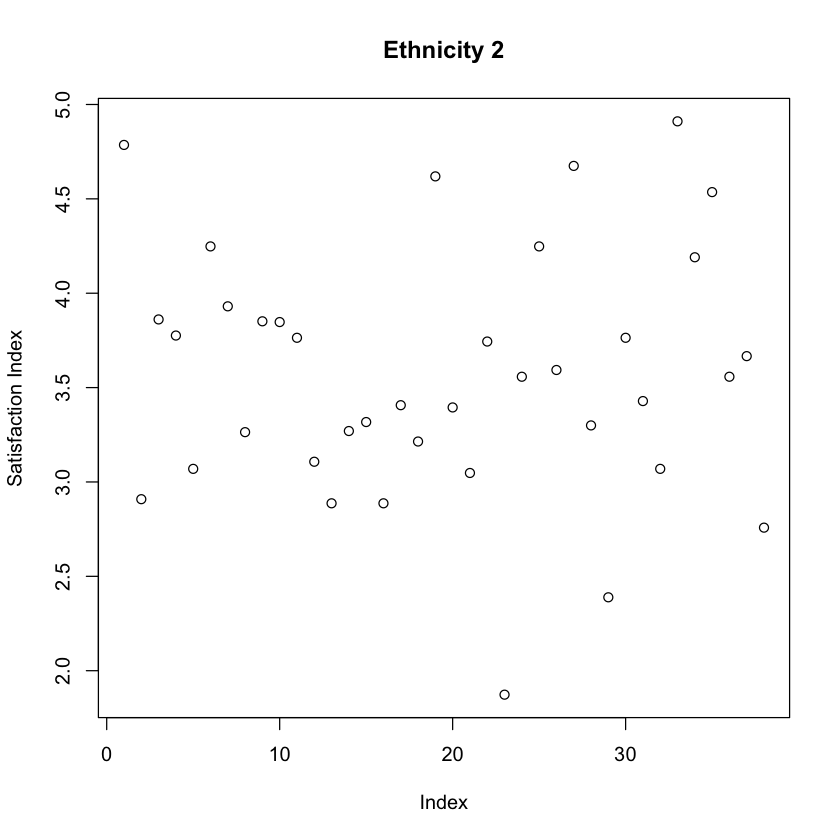

The mean E1 satisfaction is: 3.571481 
The mean E2 satisfaction is: 3.783865 
The mean E3 satisfaction is: 3.807738 
First row is E1 secon is E2, third is E3


,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
X1,1,44,3.783865,0.4937651,3.948413,3.820437,0.4721375,2.569444,4.593254,2.023810,-0.646864819,-0.60885987,0.07443789
X11,1,38,3.571481,0.6612696,3.557540,3.572669,0.5309708,1.873016,4.910714,3.037698,-0.008544941,-0.08382517,0.10727210
X12,1,10,3.807738,0.4500733,3.758929,3.807788,0.4809625,3.117063,4.498016,1.380952,0.079701141,-1.53542433,0.14232566


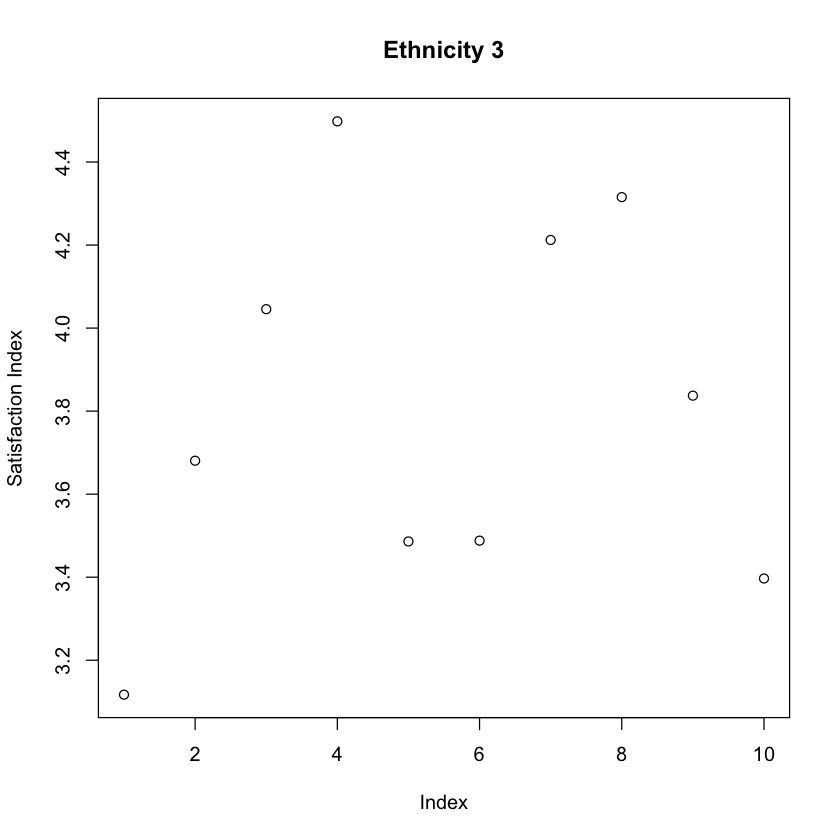

In [10]:
E1   = subset(indexed,EthnicGrp == 1)
E2   = subset(indexed,EthnicGrp == 2)
E3   = subset(indexed,EthnicGrp == 3)

hist(E1$factoroverall)
hist(E2$factoroverall)
hist(E3$factoroverall)

plot(E1$factoroverall,ylab = "Satisfaction Index")
title("Ethnicity 1")
plot(E2$factoroverall,ylab = "Satisfaction Index")
title("Ethnicity 2")
plot(E3$factoroverall,ylab = "Satisfaction Index")
title("Ethnicity 3")

cat("The mean E1 satisfaction is:",mean(E2$factoroverall),
    "\nThe mean E2 satisfaction is:",mean(E1$factoroverall),"\nThe mean E3 satisfaction is:",mean(E3$factoroverall),
    "\nFirst row is E1 secon is E2, third is E3\n")

rbind(describe(E1$factoroverall),describe(E2$factoroverall),describe(E3$factoroverall))

### Function

We can see that the Control people are more satisfied than Treatment and Control's satisfaction seems to be normally distributed.


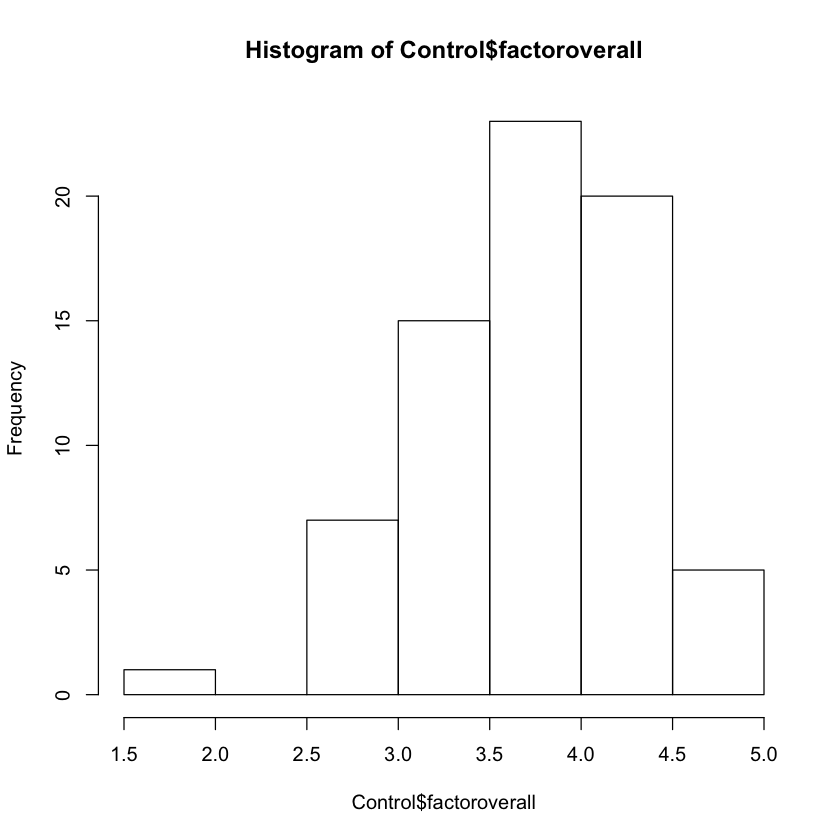

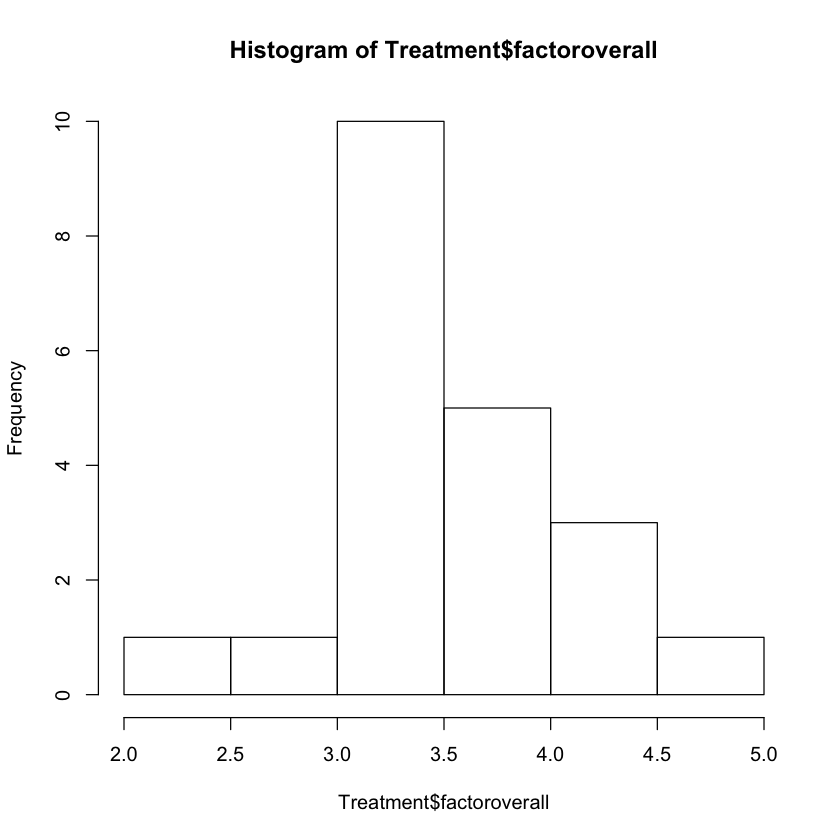

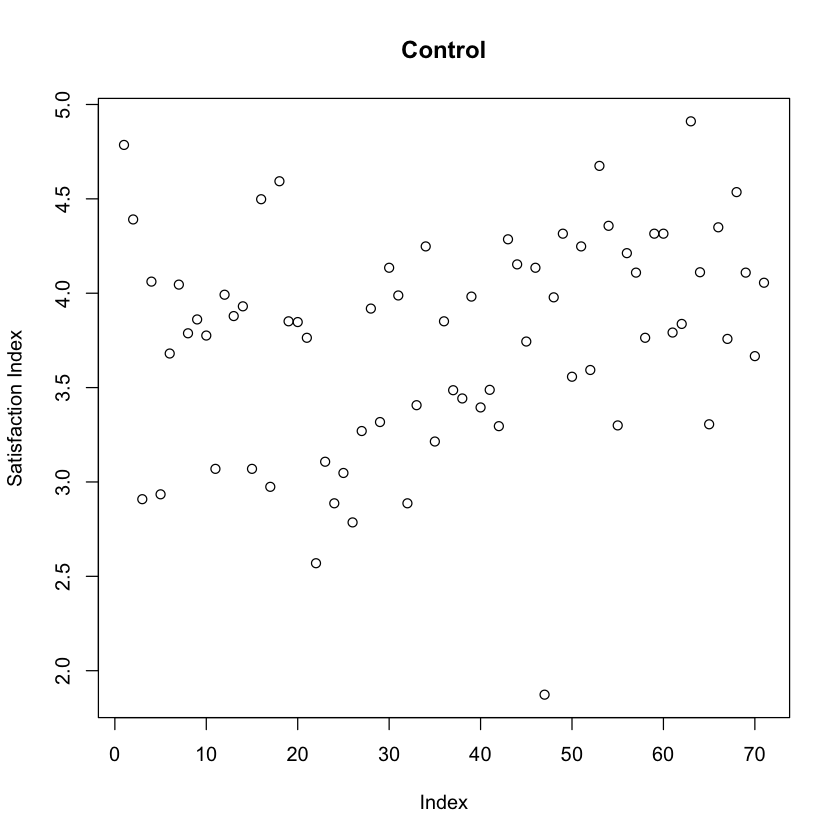

The mean Control satisfaction is: 3.757517 
The mean Treatment satisfaction is: 3.656796 
First row is Control second is Treatment


,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
X1,1,71,3.757517,0.5699207,3.847222,3.781572,0.5942167,1.873016,4.910714,3.037698,-0.5626522,0.3488310,0.06763714
X11,1,21,3.500000,0.5351437,3.428571,3.499183,0.4618417,2.388889,4.619048,2.230159,0.1746008,-0.4646801,0.11677794


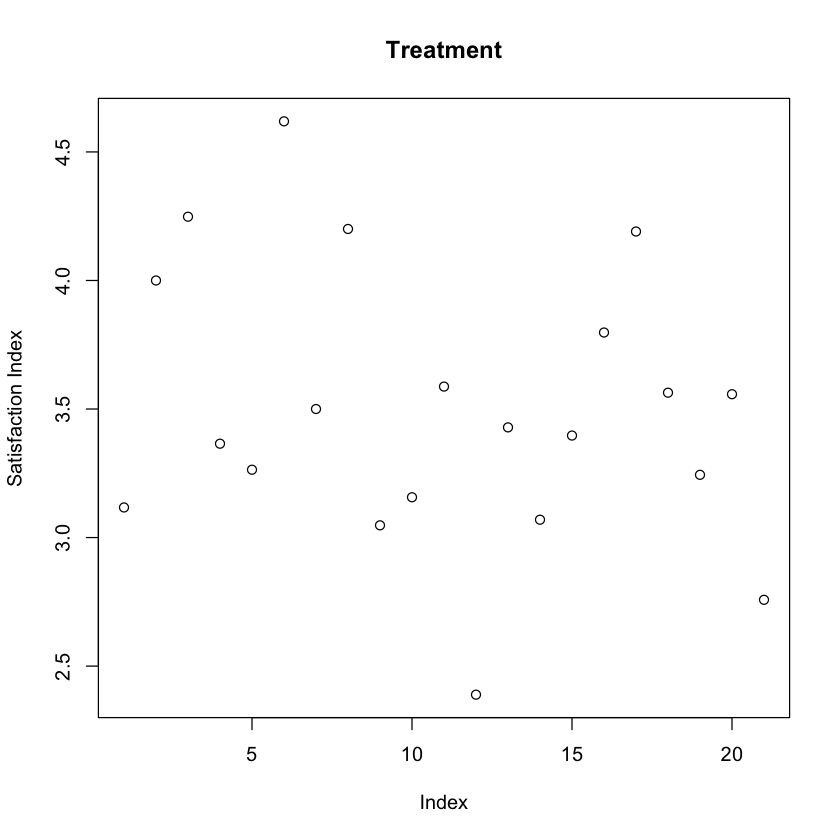

In [11]:
Treatment   = subset(indexed,(RAS %in% c(2,5)))
Control     =  subset(indexed,!RAS %in% c(2,5))

hist(Control$factoroverall)
hist(Treatment$factoroverall)

plot(Control$factoroverall,ylab = "Satisfaction Index")
title("Control")
plot(Treatment$factoroverall,ylab = "Satisfaction Index")
title("Treatment")

cat("The mean Control satisfaction is:",mean(Control$factoroverall),
    "\nThe mean Treatment satisfaction is:",mean(females$factoroverall),"\nFirst row is Control second is Treatment\n")

rbind(describe(Control$factoroverall),describe(Treatment$factoroverall))

### Rank

We see that the higher ranking people in the company are more satisfied in general. 

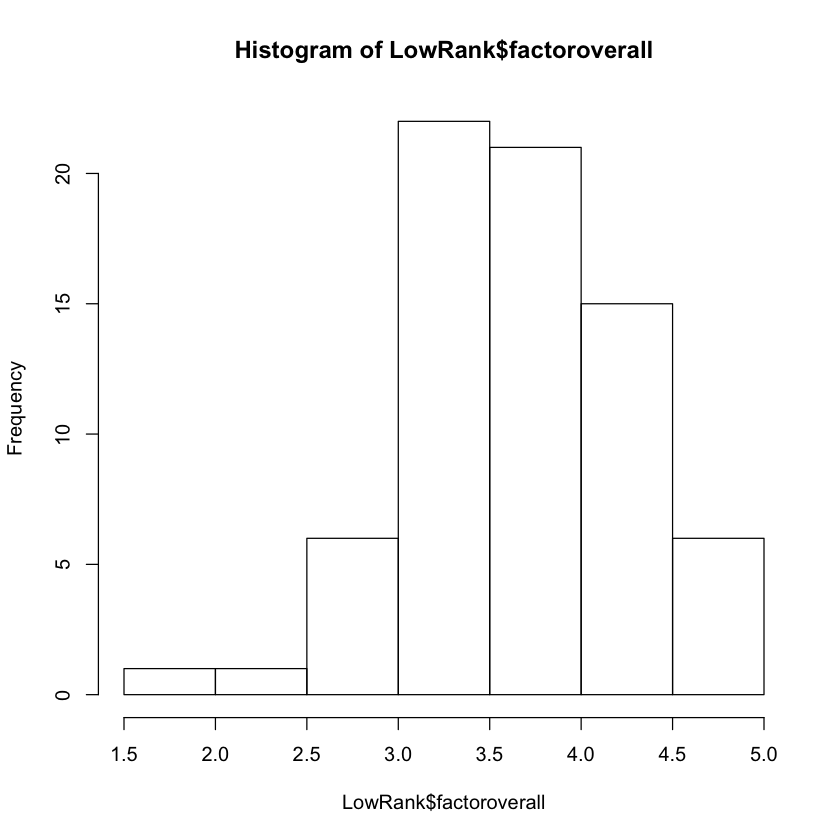

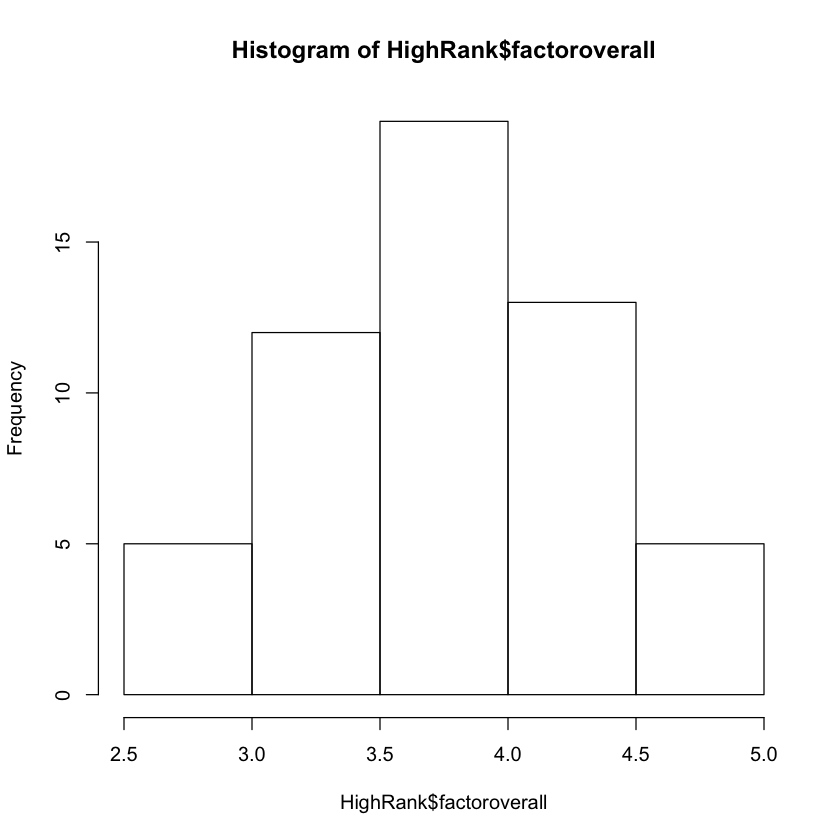

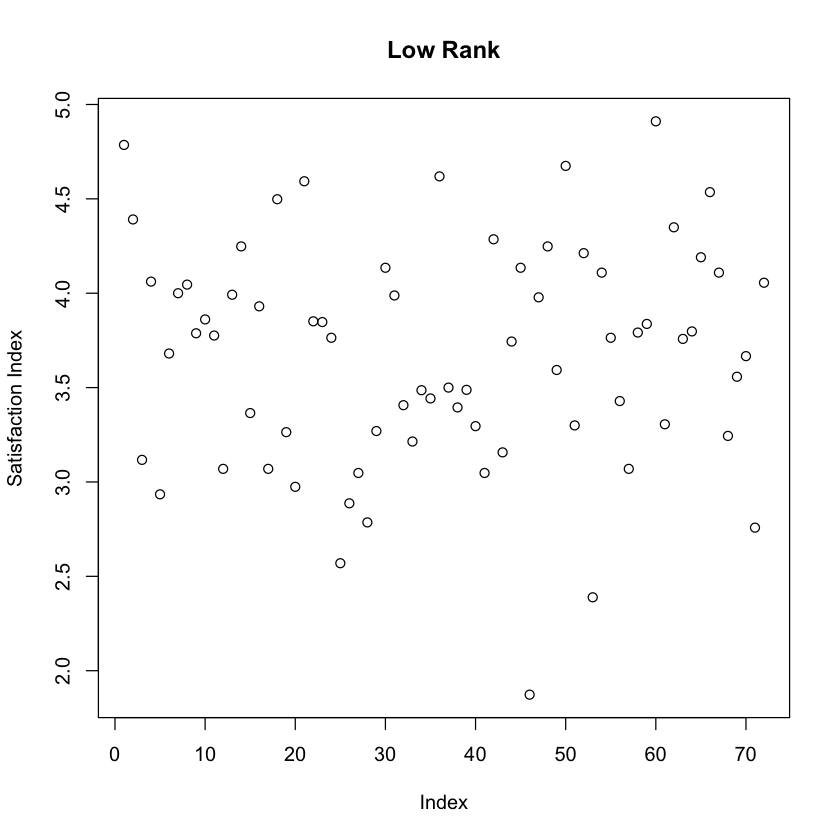

The mean Low Rank satisfaction is: 3.670993 
The mean High Rank satisfaction is: 3.791814 
First row is Control second is Treatment


,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
X1,1,54,3.791814,0.5133615,3.849206,3.794868,0.5280292,2.757937,4.910714,2.152778,-0.09825362,-0.61561158,0.06985965
X11,1,72,3.670993,0.5919013,3.760913,3.681000,0.6118667,1.873016,4.910714,3.037698,-0.30005256,0.01907962,0.06975624


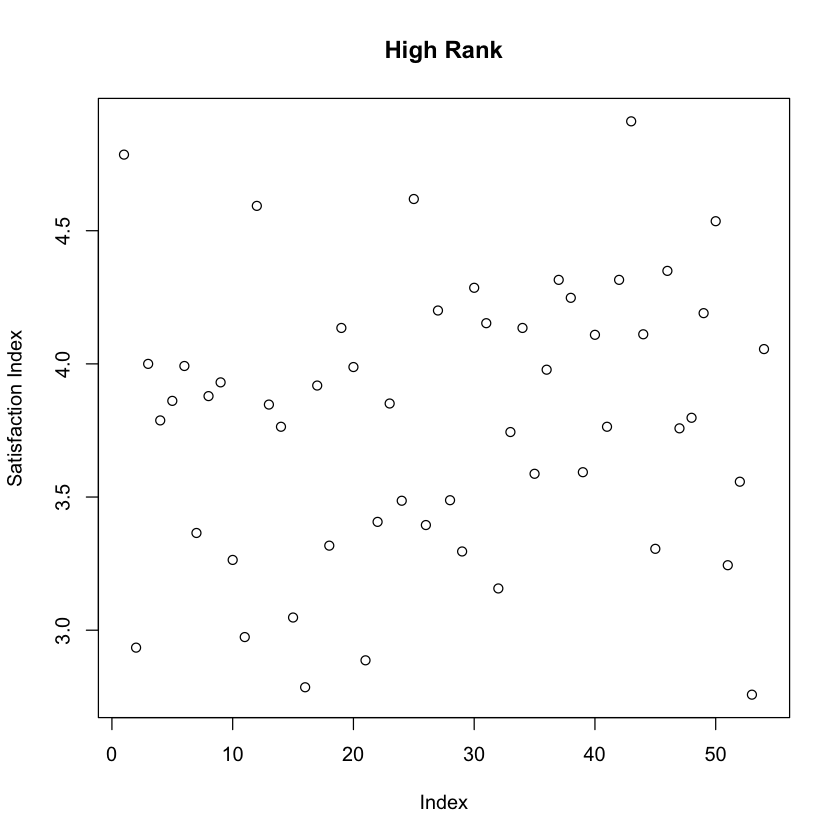

In [12]:
LowRank      = subset(indexed,(Rank %in% c(1,2,3,4)))
HighRank     =  subset(indexed,!RAS %in% c(1,2,3,4))

hist(LowRank$factoroverall)
hist(HighRank$factoroverall)

plot(LowRank$factoroverall,ylab = "Satisfaction Index")
title("Low Rank")
plot(HighRank$factoroverall,ylab = "Satisfaction Index")
title("High Rank")

cat("The mean Low Rank satisfaction is:",mean(LowRank$factoroverall),
    "\nThe mean High Rank satisfaction is:",mean(HighRank$factoroverall),"\nFirst row is Control second is Treatment\n")

rbind(describe(HighRank$factoroverall),describe(LowRank$factoroverall))

### Education Level

We can see that the education level does not introduce significant changes to the data. But we can say that higher edducation lends to higher satisfaction. This may be correlated to the Rank.

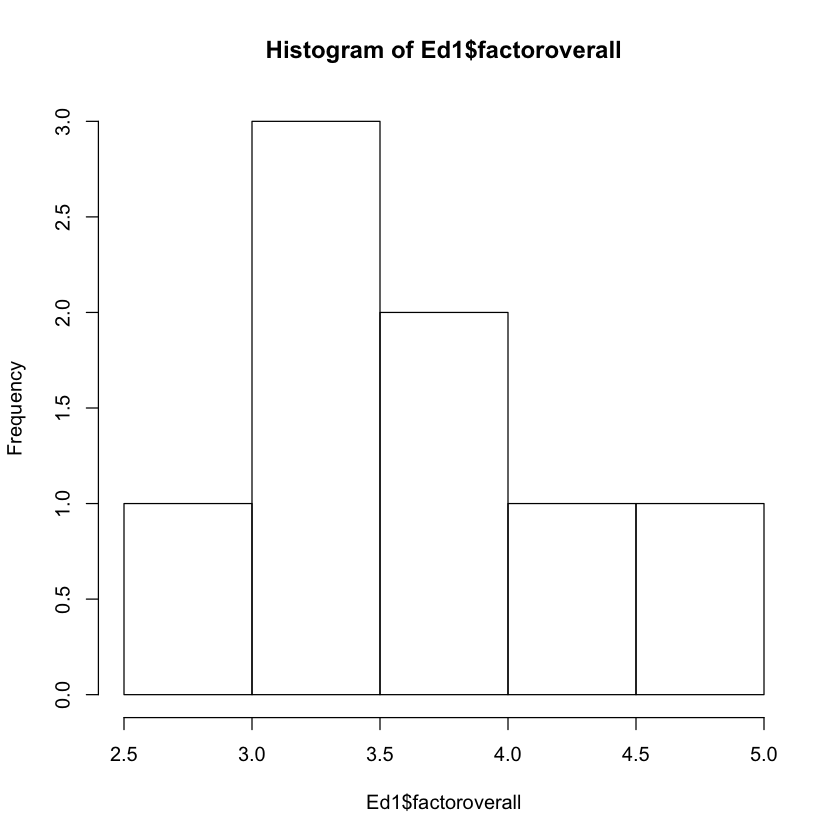

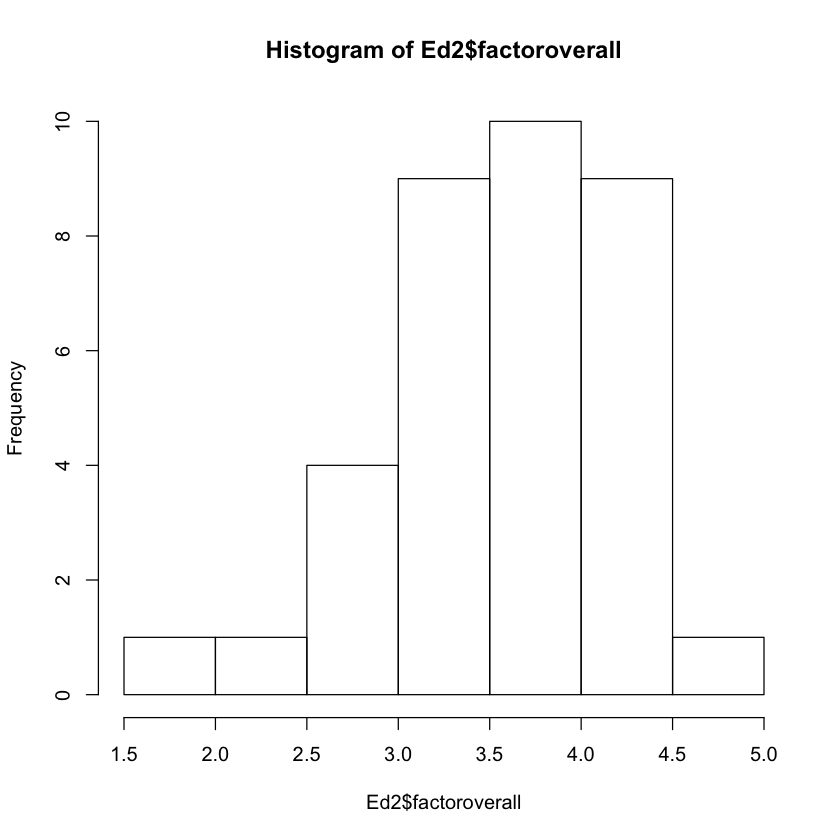

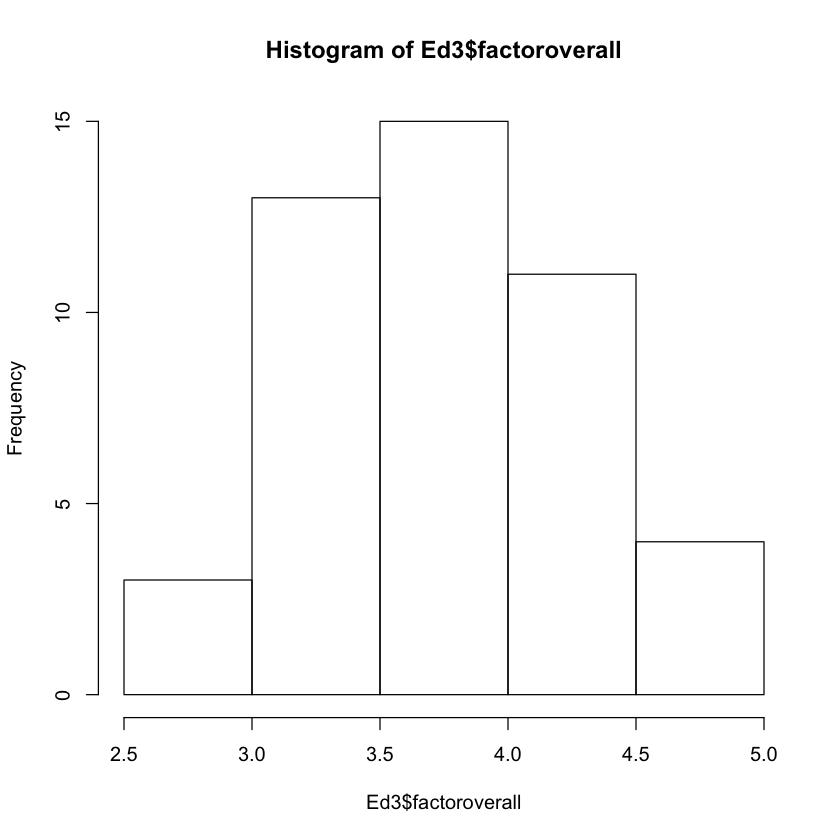

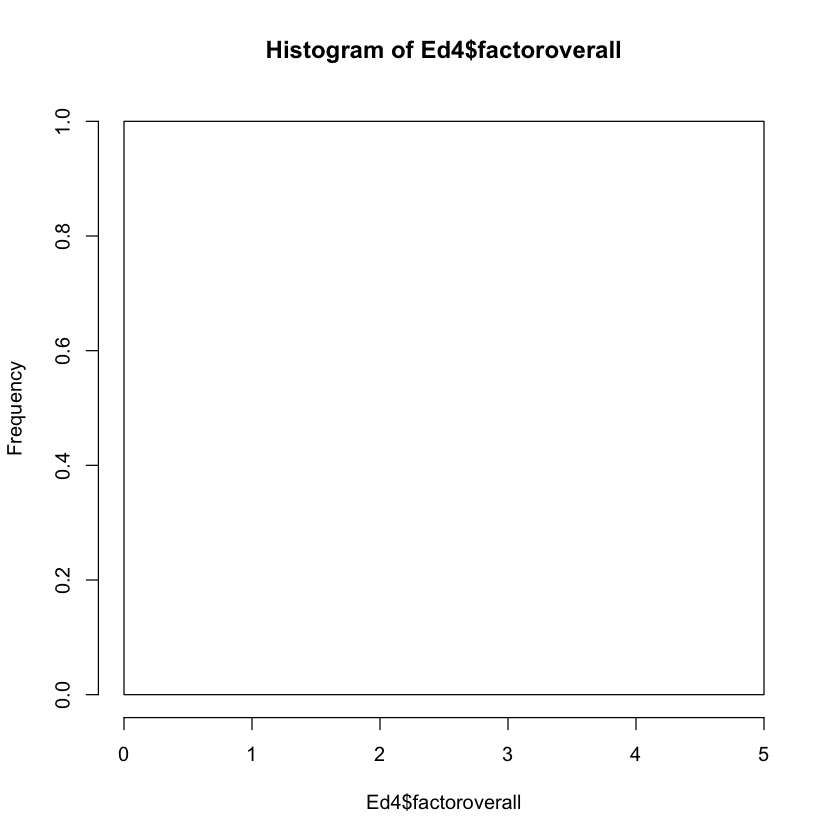

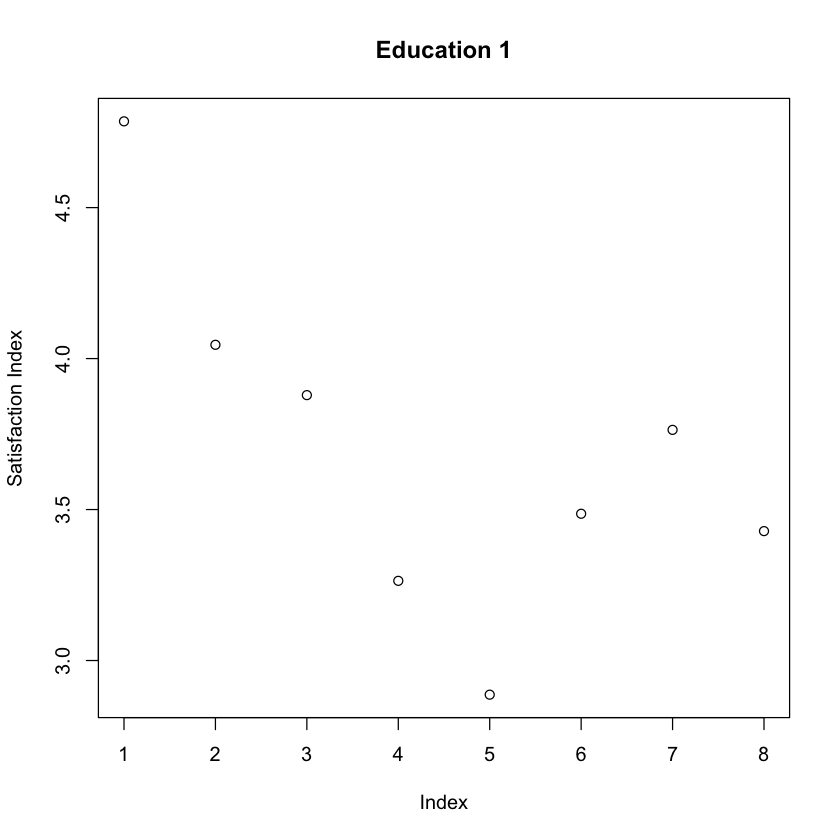

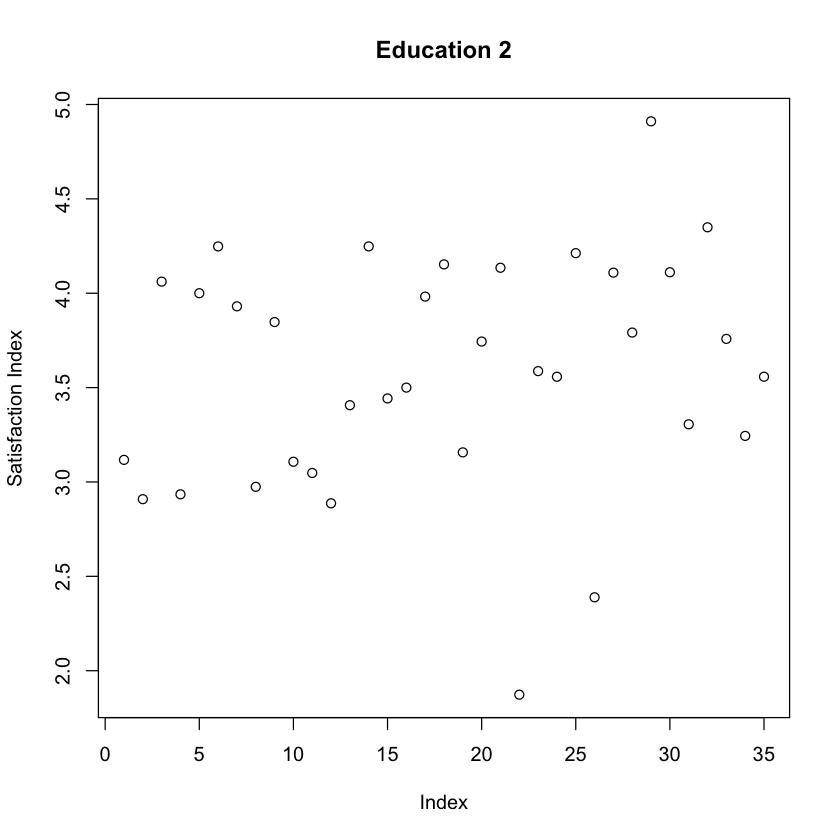

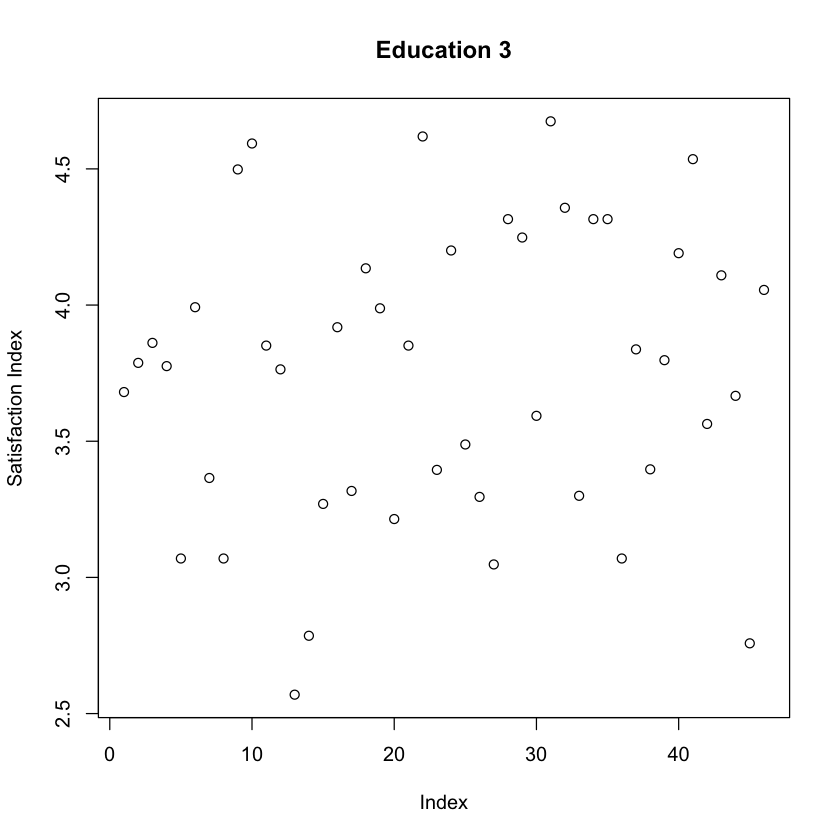

The mean Education 1 satisfaction is: 3.571481 
The mean Edcation 2 satisfaction is: 3.783865 
The mean Education 3 satisfaction is: 3.807738 
The mean Education 4 satisfaction is: 3.807738 
First row is Ed1 second is Ed2...


,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
X1,1,8,3.692460,0.5737887,3.625000,3.692460,0.4559583,2.886905,4.785714,1.898810,0.4823352,-0.8010885,0.20286494
X11,1,35,3.588209,0.6162107,3.587302,3.618295,0.7030583,1.873016,4.910714,3.037698,-0.4831980,0.1977384,0.10415862
X12,1,46,3.750043,0.5348594,3.792659,3.761017,0.6192208,2.569444,4.674603,2.105159,-0.1893251,-0.8440333,0.07886072
X13,1,1,4.390873,NA,4.390873,4.390873,0.0000000,4.390873,4.390873,0.000000,NA,NA,NA


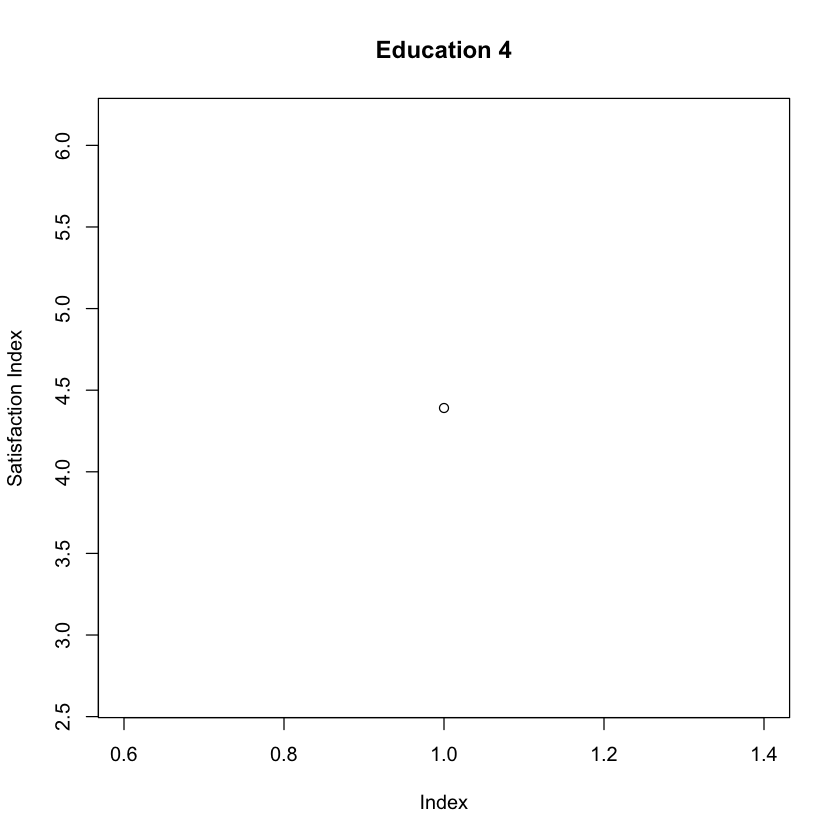

In [13]:
Ed1   = subset(indexed,EducLv == 1)
Ed2   = subset(indexed,EducLv == 2)
Ed3   = subset(indexed,EducLv == 3)
Ed4   = subset(indexed,EducLv == 4)

hist(Ed1$factoroverall)
hist(Ed2$factoroverall)
hist(Ed3$factoroverall)
hist(Ed4$factoroverall)

plot(Ed1$factoroverall,ylab = "Satisfaction Index")
title("Education 1")
plot(Ed2$factoroverall,ylab = "Satisfaction Index")
title("Education 2")
plot(Ed3$factoroverall,ylab = "Satisfaction Index")
title("Education 3")
plot(Ed4$factoroverall,ylab = "Satisfaction Index")
title("Education 4")

cat("The mean Education 1 satisfaction is:",mean(E2$factoroverall),
    "\nThe mean Edcation 2 satisfaction is:",mean(E1$factoroverall),
    "\nThe mean Education 3 satisfaction is:",mean(E3$factoroverall),
    "\nThe mean Education 4 satisfaction is:",mean(E3$factoroverall),
    "\nFirst row is Ed1 second is Ed2...\n")

rbind(describe(Ed1$factoroverall),describe(Ed2$factoroverall),describe(Ed3$factoroverall),describe(Ed4$factoroverall))


### Age

Group 1 is the youngest and Group 4 is the oldest (intervals: 0-20, 20-30, 30-50, 50+)

We see that younger people are more happy (especially the 20-30 bracket).

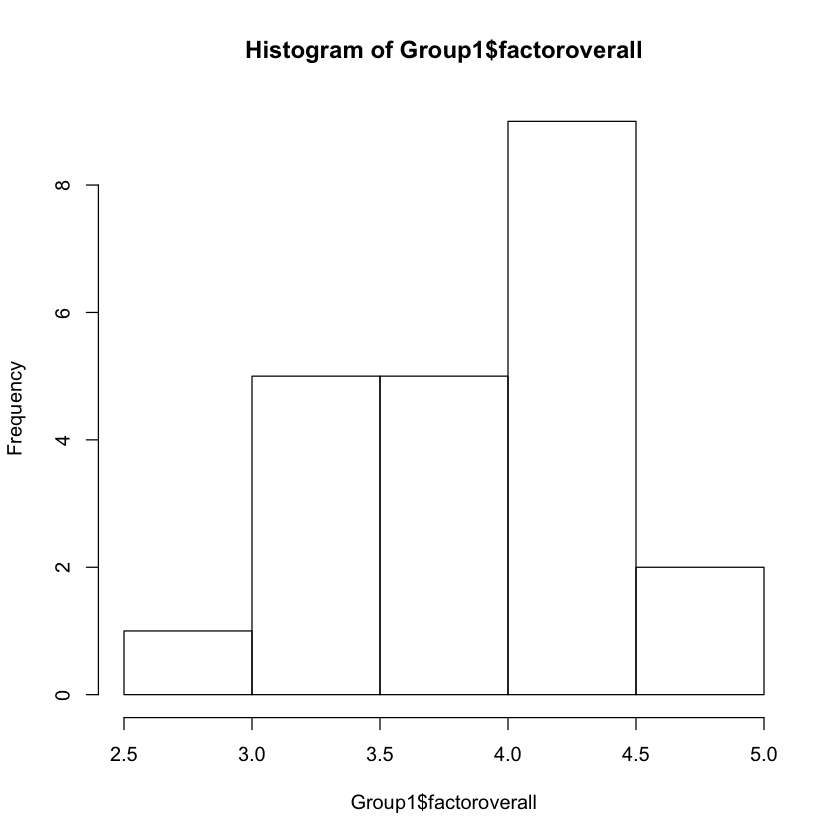

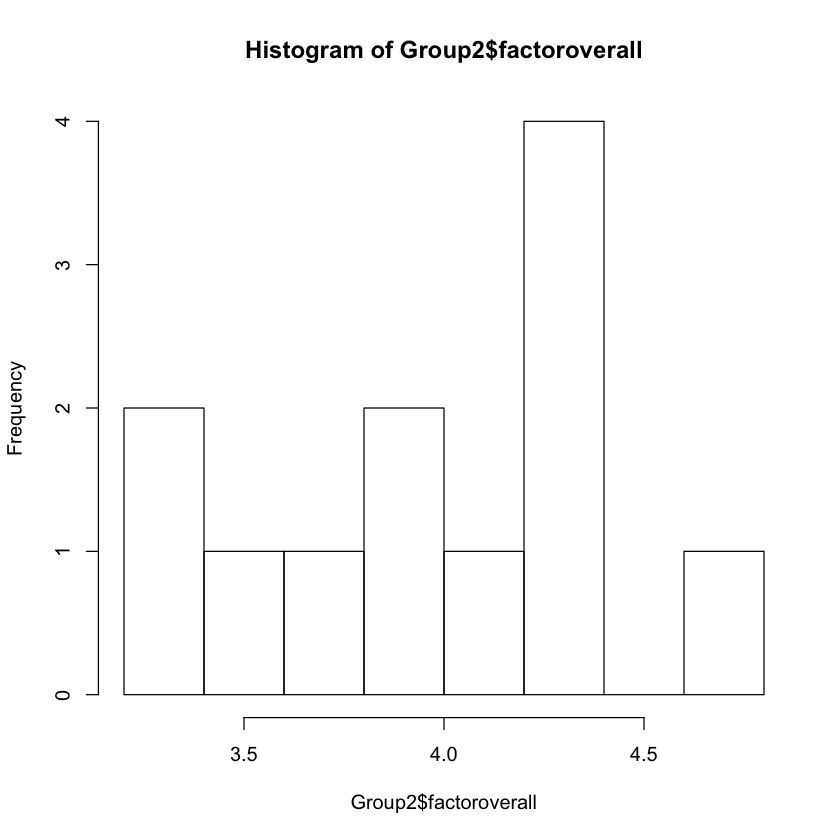

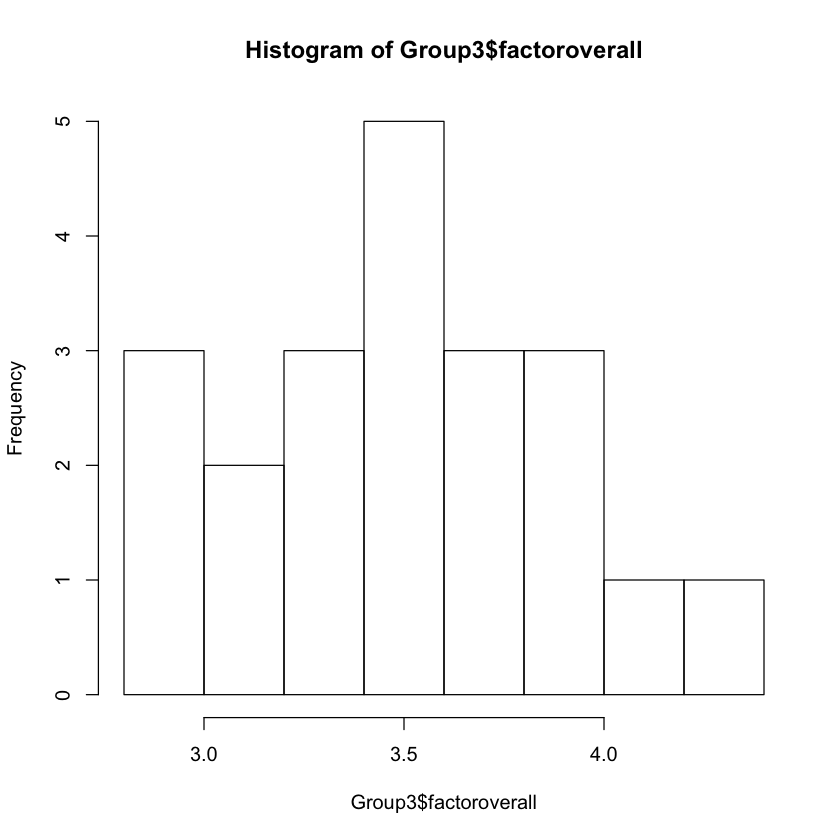

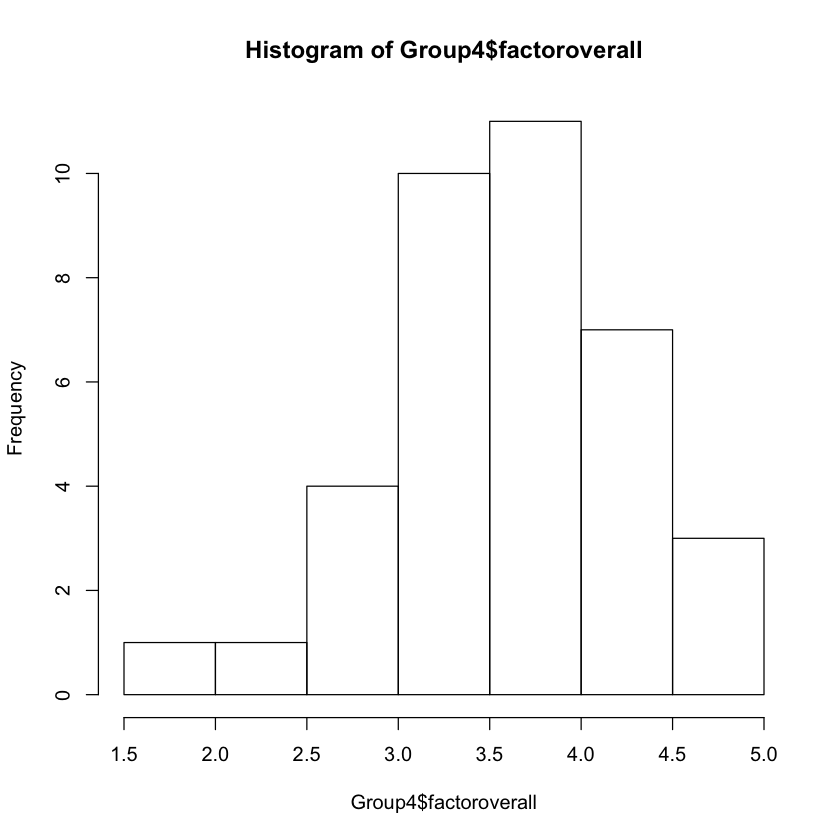

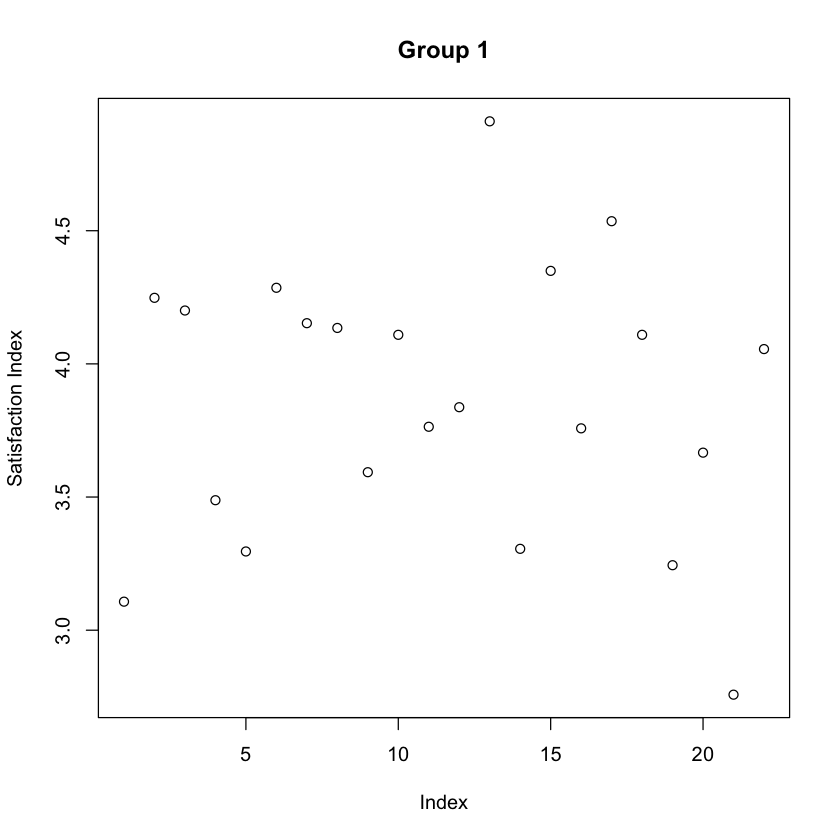

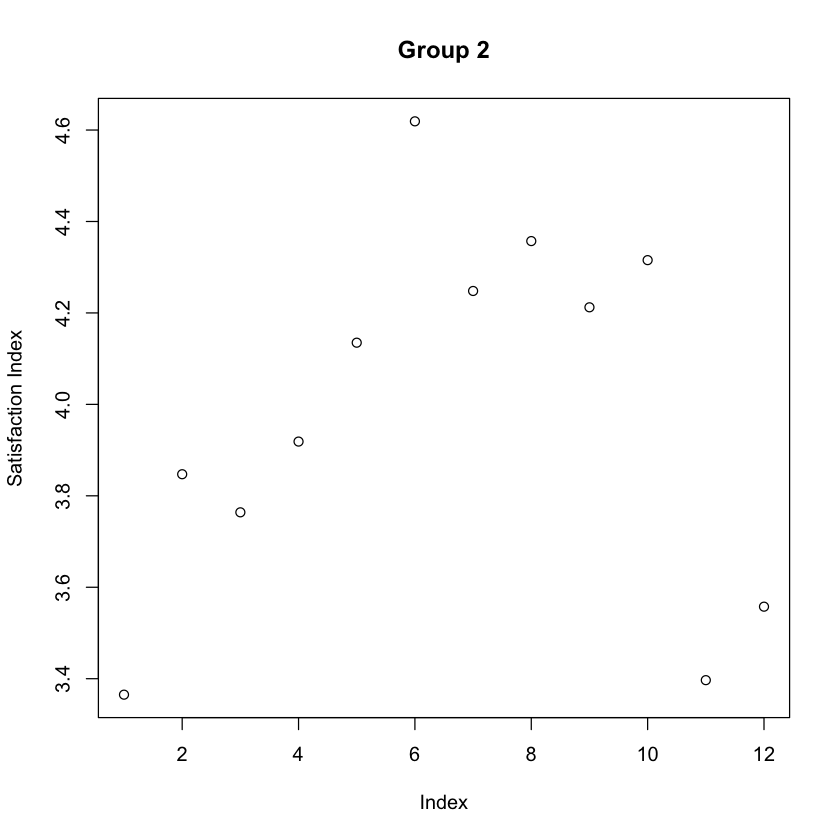

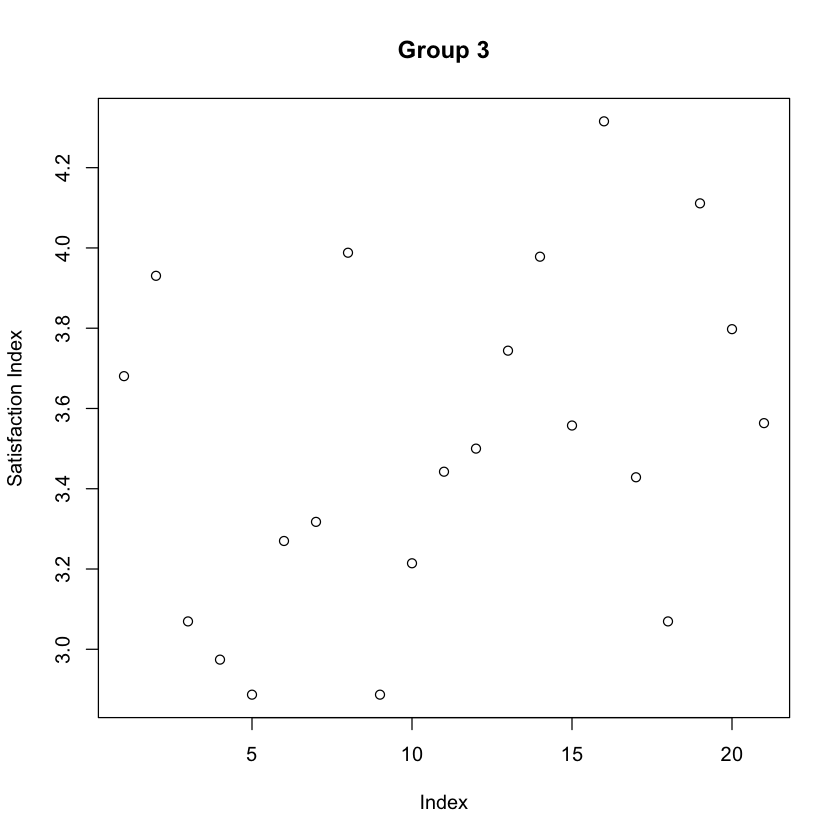

The mean Group1 satisfaction is: 3.859488 
The mean Group2 satisfaction is: 3.978009 
The mean Group3 satisfaction is: 3.510771 
The mean Group4 satisfaction is: 3.619262 



,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
X1,1,22,3.859488,0.5175447,3.946429,3.866512,0.4750792,2.757937,4.910714,2.152778,-0.1886005,-0.6326556,0.11034090
X11,1,12,3.978009,0.4020066,4.026786,3.975198,0.4088917,3.365079,4.619048,1.253968,-0.1544557,-1.4036222,0.11604932
X12,1,21,3.510771,0.4154331,3.500000,3.501517,0.4412500,2.886905,4.315476,1.428571,0.1352025,-1.1378463,0.09065493
X13,1,37,3.619262,0.6709159,3.787698,3.646057,0.7236500,1.873016,4.785714,2.912698,-0.4012650,-0.3597679,0.11029790


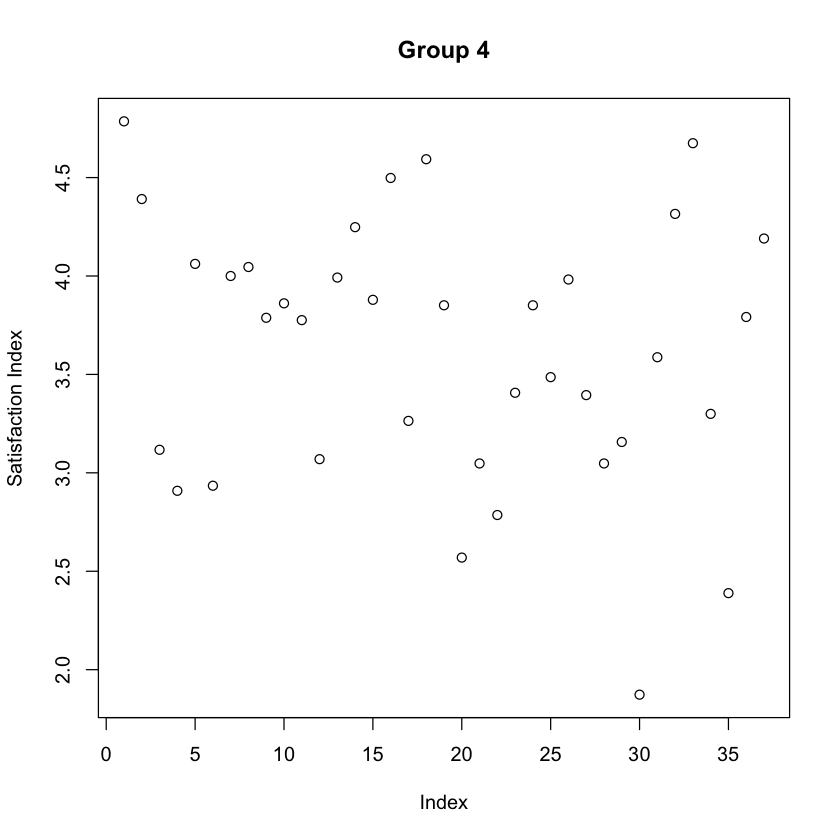

In [14]:
Group1   = subset(indexed,AgeGroups == 0)
Group2   = subset(indexed,AgeGroups == 1)
Group3   = subset(indexed,AgeGroups == 2)
Group4   = subset(indexed,AgeGroups == 3)

hist(Group1$factoroverall)
hist(Group2$factoroverall)
hist(Group3$factoroverall)
hist(Group4$factoroverall)

plot(Group1$factoroverall,ylab = "Satisfaction Index")
title("Group 1")
plot(Group2$factoroverall,ylab = "Satisfaction Index")
title("Group 2")
plot(Group3$factoroverall,ylab = "Satisfaction Index")
title("Group 3")
plot(Group4$factoroverall,ylab = "Satisfaction Index")
title("Group 4")

cat("The mean Group1 satisfaction is:",mean(Group1$factoroverall),"\nThe mean Group2 satisfaction is:",mean(Group2$factoroverall),"\nThe mean Group3 satisfaction is:",mean(Group3$factoroverall),"\nThe mean Group4 satisfaction is:",mean(Group4$factoroverall),"\n\n")

rbind(describe(Group1$factoroverall),describe(Group2$factoroverall),describe(Group3$factoroverall),describe(Group4$factoroverall))

### Years of Service

Group 1 has the least experience and Group 3 is the most (intervals: 0-20, 20-40, 40+)

We see that new people and people that has been there for 40 years are more are happier compared to the 20-40 year bracket.

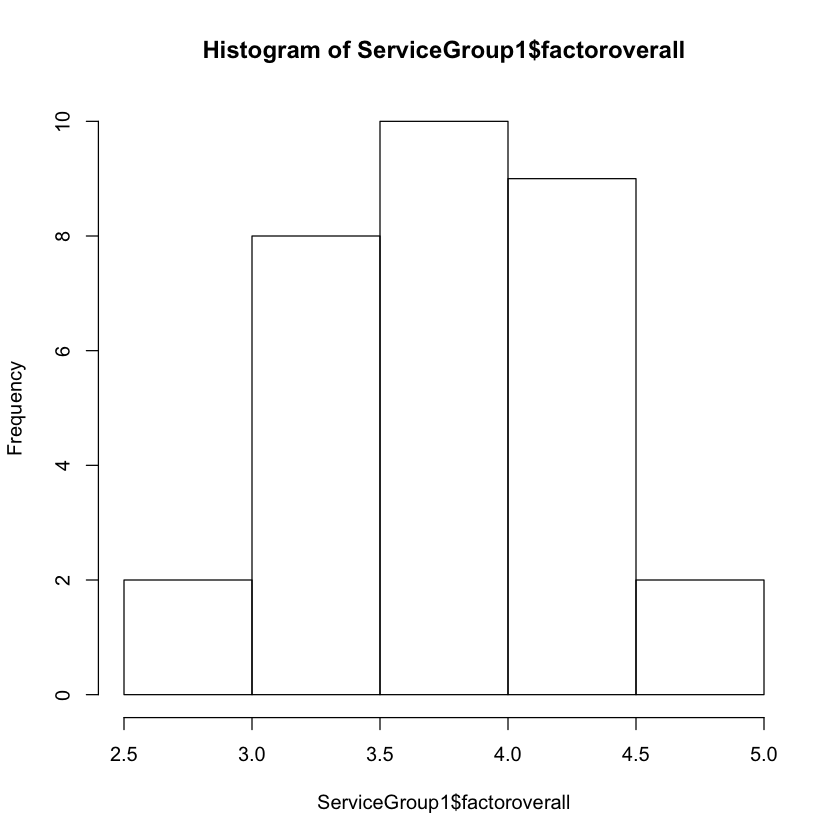

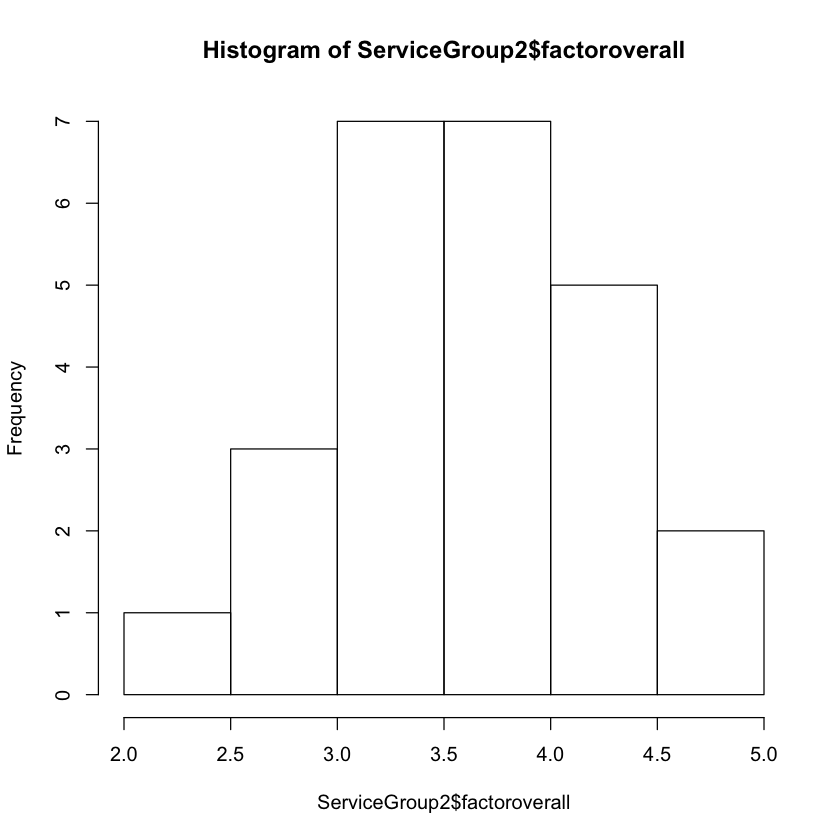

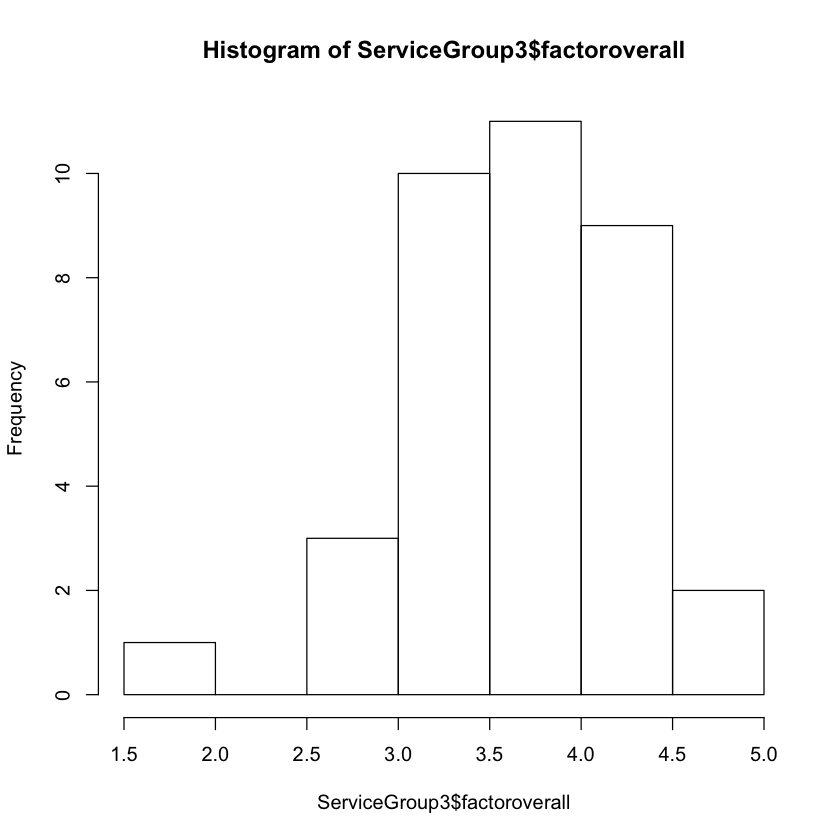

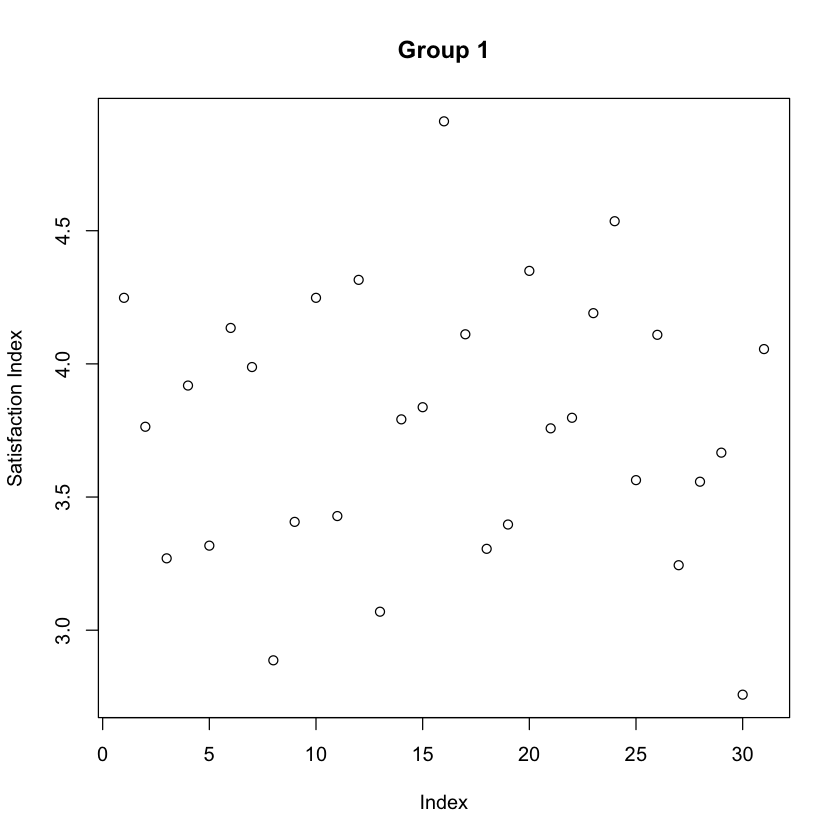

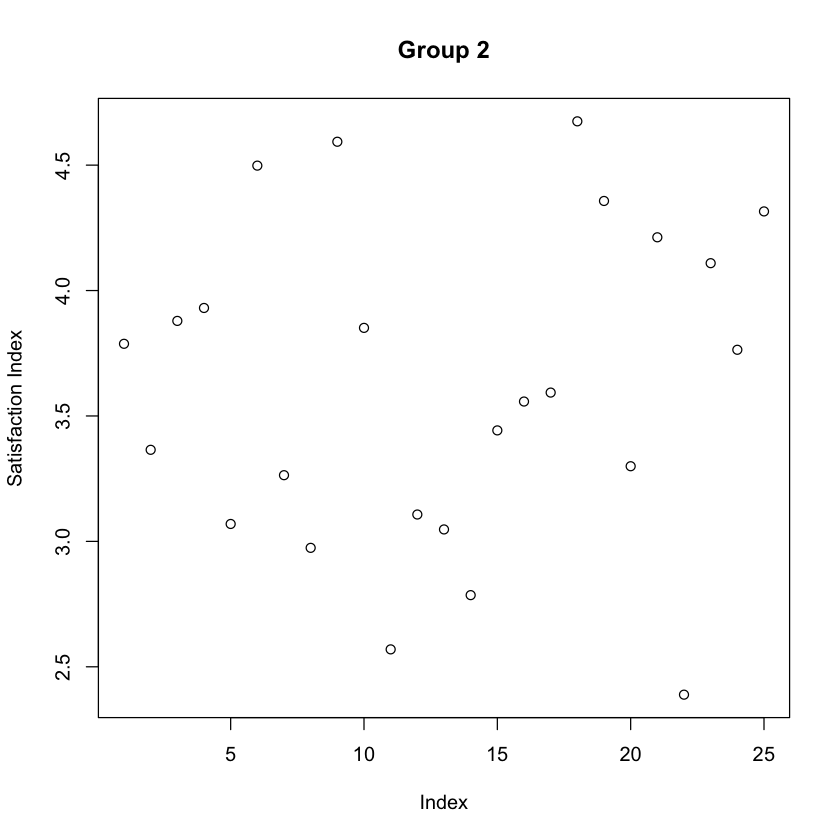

The mean Group1 satisfaction is: 3.772081 
The mean Group2 satisfaction is: 3.61746 
The mean Group3 satisfaction is: 3.692019 



,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
X1,1,31,3.772081,0.4968017,3.791667,3.776984,0.5706833,2.757937,4.910714,2.152778,0.002423641,-0.5601098,0.08922822
X11,1,25,3.617460,0.6347509,3.593254,3.629063,0.7648333,2.388889,4.674603,2.285714,-0.076745935,-1.0473984,0.12695018
X12,1,36,3.692019,0.5887343,3.811508,3.714947,0.5412667,1.873016,4.785714,2.912698,-0.671540725,0.6240609,0.09812239


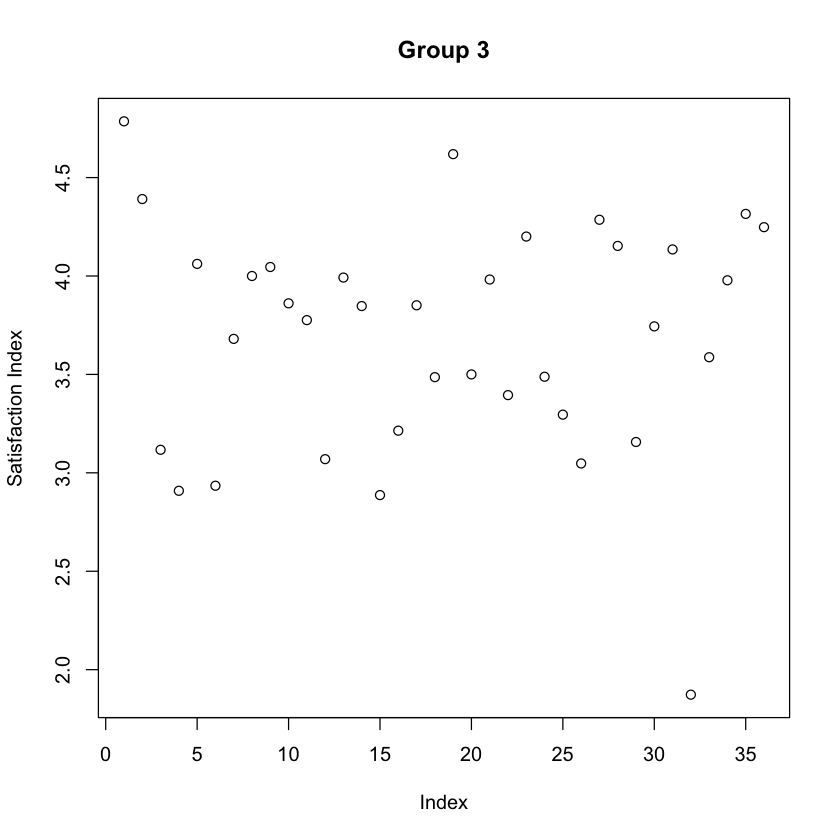

In [15]:
ServiceGroup1   = subset(indexed,YearsofServiceGroups == 0)
ServiceGroup2   = subset(indexed,YearsofServiceGroups == 1)
ServiceGroup3   = subset(indexed,YearsofServiceGroups == 2)

hist(ServiceGroup1$factoroverall)
hist(ServiceGroup2$factoroverall)
hist(ServiceGroup3$factoroverall)

plot(ServiceGroup1$factoroverall,ylab = "Satisfaction Index")
title("Group 1")
plot(ServiceGroup2$factoroverall,ylab = "Satisfaction Index")
title("Group 2")
plot(ServiceGroup3$factoroverall,ylab = "Satisfaction Index")
title("Group 3")

cat("The mean Group1 satisfaction is:",mean(ServiceGroup1$factoroverall),"\nThe mean Group2 satisfaction is:",mean(ServiceGroup2$factoroverall),"\nThe mean Group3 satisfaction is:",mean(ServiceGroup3$factoroverall),"\n\n")

rbind(describe(ServiceGroup1$factoroverall),describe(ServiceGroup2$factoroverall),describe(ServiceGroup3$factoroverall))

## Estimation Model

We can see that most of our models predict the desired factor within ~0.6 points around the avtual score using the determined prameters. Below you can find statistical desriptions and results of the models.

In [19]:
library(caret)

set.seed(42)

trainingID = createDataPartition(indexed_data$ID,p=0.7,list=FALSE,times=1)

train = indexed_data[trainingID,]

train = train[,colnames(train) %in% c("factor1","factor2","factor3","factor4","factor5","factor6","factoroverall","ID","Division","RAS","pctinvalid","Team","Rank","Title","EducLv","AgeGroups","Sex","EthnicGrp","Citizenship","YearsofServiceGroups")]

test  = indexed_data[-trainingID,]

testresults = test[,colnames(test) %in% c("factor1","factor2","factor3","factor4","factor5","factor6","factoroverall")]

test  = test[,!colnames(test) %in% c("factor1","factor2","factor3","factor4","factor5","factor6","factoroverall")]

  
test =  test[,colnames(test) %in% c("ID","Division","RAS","pctinvalid","Team","Rank","Title","EducLv","AgeGroups","Sex","EthnicGrp","Citizenship","YearsofServiceGroups")]

colnames(train)

[1] "ID"                   "Division"             "RAS"                 
 [4] "pctinvalid"           "Team"                 "Rank"                
 [7] "Title"                "EducLv"               "Sex"                 
[10] "EthnicGrp"            "Citizenship"          "factor1"             
[13] "factor2"              "factor3"              "factor4"             
[16] "factor5"              "factor6"              "factoroverall"       
[19] "AgeGroups"            "YearsofServiceGroups"

In [21]:
attach(train)

Factor1_Model = lm(factor1 ~ Division + RAS + pctinvalid + Team 
            + Rank  + EducLv + AgeGroups + Sex + EthnicGrp
            + Citizenship + YearsofServiceGroups, data = train)

Factor2_Model = lm(factor2 ~ Division + RAS + pctinvalid + Team 
            + Rank  + EducLv + AgeGroups + Sex + EthnicGrp
            + Citizenship + YearsofServiceGroups, data = train) 

Factor3_Model = lm(factor3 ~ Division + RAS + pctinvalid + Team 
            + Rank  + EducLv + AgeGroups + Sex + EthnicGrp
            + Citizenship + YearsofServiceGroups, data = train)
  
Factor4_Model = lm(factor4 ~ Division + RAS + pctinvalid + Team 
            + Rank + EducLv + AgeGroups + Sex + EthnicGrp
            + Citizenship + YearsofServiceGroups, data = train)
  
Factor5_Model = lm(factor5 ~ Division + RAS + pctinvalid + Team 
            + Rank + EducLv + AgeGroups + Sex + EthnicGrp
            + Citizenship + YearsofServiceGroups, data = train)
  
Factor6_Model = lm(factor6 ~ Division + RAS + pctinvalid + Team 
            + Rank + EducLv + AgeGroups + Sex + EthnicGrp
            + Citizenship + YearsofServiceGroups, data = train)

Overall_Model = lm(factoroverall ~ Division + RAS + pctinvalid + Team 
            + Rank + EducLv + AgeGroups + Sex + EthnicGrp
            + Citizenship + YearsofServiceGroups, data = train)

detach(train)

The following objects are masked _by_ .GlobalEnv:

    factor1, factor2, factor3, factor4, factor5, factor6, factoroverall



#### Factor 1


Call:
lm(formula = factor1 ~ Division + RAS + pctinvalid + Team + Rank + 
    EducLv + AgeGroups + Sex + EthnicGrp + Citizenship + YearsofServiceGroups, 
    data = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.16246 -0.34219  0.05326  0.37702  1.11368 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)   
(Intercept)           3.786643   1.155482   3.277  0.00195 **
Division              0.380105   0.147880   2.570  0.01332 * 
RAS                  -0.032506   0.044539  -0.730  0.46905   
pctinvalid1.25        0.313742   0.827159   0.379  0.70614   
pctinvalid10          0.623388   0.697278   0.894  0.37577   
pctinvalid2.5         1.810850   0.749578   2.416  0.01955 * 
pctinvalid3.75        1.013813   0.799100   1.269  0.21067   
pctinvalid5           0.616648   0.728329   0.847  0.40139   
pctinvalid6.25        0.289760   0.722120   0.401  0.69001   
pctinvalid7.5         0.751299   0.720858   1.042  0.30253   
pctinvalid8.75        0.00

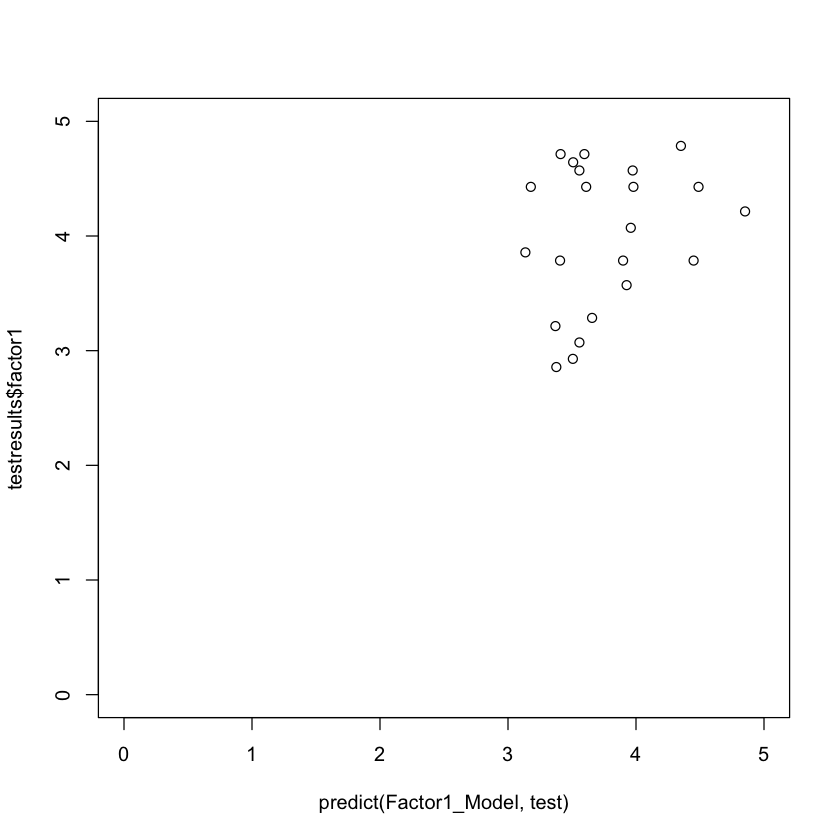

In [23]:
summary(Factor1_Model)
plot(predict(Factor1_Model,test),testresults$factor1,xlim = c(0,5),ylim = c(0,5))

#### Factor 2


Call:
lm(formula = factor2 ~ Division + RAS + pctinvalid + Team + Rank + 
    EducLv + AgeGroups + Sex + EthnicGrp + Citizenship + YearsofServiceGroups, 
    data = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.65128 -0.37912  0.05833  0.31889  1.53302 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)   
(Intercept)           4.26612    1.51315   2.819  0.00697 **
Division              0.15380    0.19365   0.794  0.43099   
RAS                   0.02672    0.05833   0.458  0.64891   
pctinvalid1.25       -1.87404    1.08319  -1.730  0.09004 . 
pctinvalid10         -0.10641    0.91311  -0.117  0.90771   
pctinvalid2.5         1.12772    0.98160   1.149  0.25631   
pctinvalid3.75       -0.02641    1.04645  -0.025  0.97997   
pctinvalid5          -0.27197    0.95377  -0.285  0.77675   
pctinvalid6.25        0.01468    0.94564   0.016  0.98768   
pctinvalid7.5         0.05415    0.94399   0.057  0.95450   
pctinvalid8.75       -0.71295    0.98

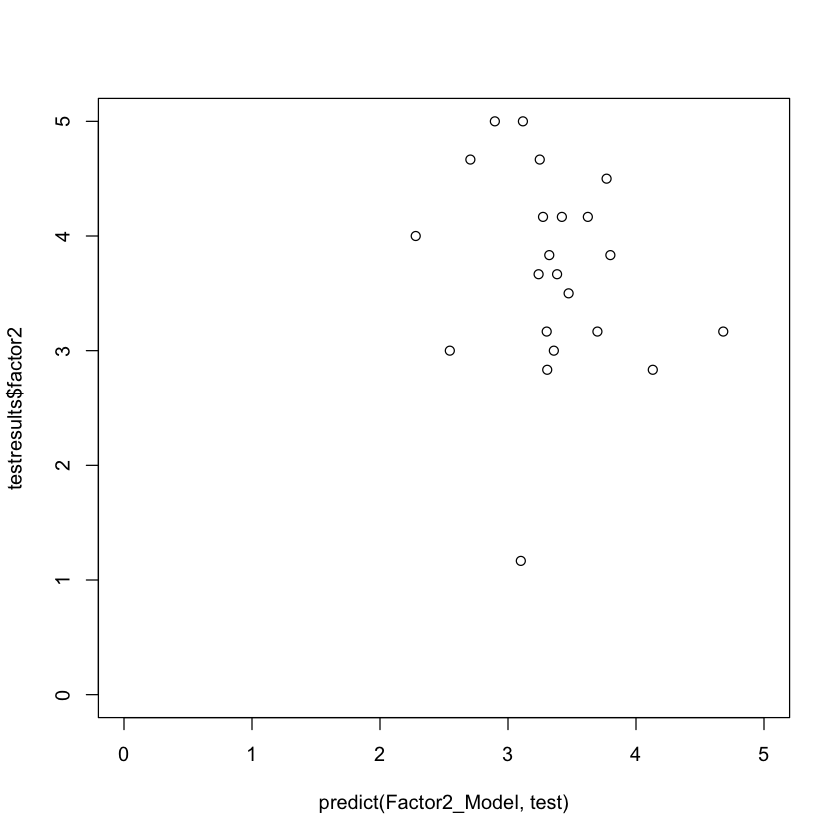

In [24]:
summary(Factor2_Model)

plot(predict(Factor2_Model,test),testresults$factor2,xlim = c(0,5),ylim = c(0,5))

#### Factor 3


Call:
lm(formula = factor3 ~ Division + RAS + pctinvalid + Team + Rank + 
    EducLv + AgeGroups + Sex + EthnicGrp + Citizenship + YearsofServiceGroups, 
    data = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.88026 -0.53964  0.04693  0.69615  1.81455 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)  
(Intercept)           4.22356    1.95062   2.165   0.0354 *
Division             -0.08090    0.24964  -0.324   0.7473  
RAS                   0.06437    0.07519   0.856   0.3962  
pctinvalid1.25       -0.67718    1.39636  -0.485   0.6299  
pctinvalid10         -0.60986    1.17711  -0.518   0.6068  
pctinvalid2.5         0.66998    1.26540   0.529   0.5989  
pctinvalid3.75       -0.01548    1.34900  -0.011   0.9909  
pctinvalid5          -0.42961    1.22952  -0.349   0.7283  
pctinvalid6.25       -0.28448    1.21904  -0.233   0.8165  
pctinvalid7.5         0.06033    1.21691   0.050   0.9607  
pctinvalid8.75       -0.24434    1.27025  -0.192

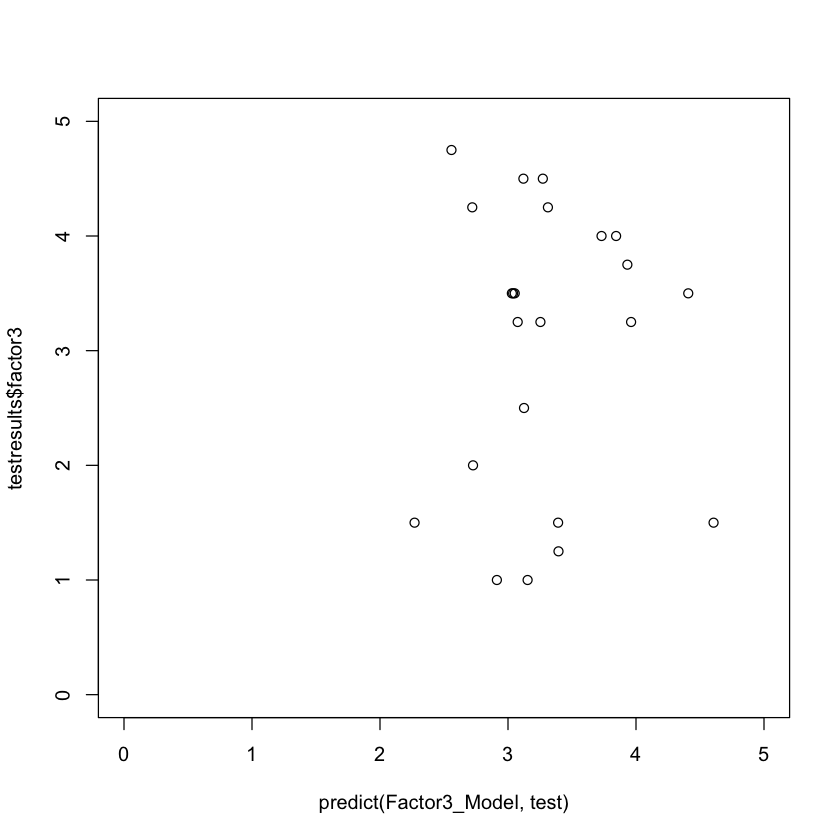

In [26]:
summary(Factor3_Model)

plot(predict(Factor3_Model,test),testresults$factor3,xlim = c(0,5),ylim = c(0,5))

#### Factor 4



Call:
lm(formula = factor4 ~ Division + RAS + pctinvalid + Team + Rank + 
    EducLv + AgeGroups + Sex + EthnicGrp + Citizenship + YearsofServiceGroups, 
    data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.2106 -0.4349  0.0000  0.4310  1.4872 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)  
(Intercept)           2.205992   1.384900   1.593   0.1177  
Division              0.222718   0.177241   1.257   0.2150  
RAS                   0.006269   0.053383   0.117   0.9070  
pctinvalid1.25        1.191645   0.991388   1.202   0.2353  
pctinvalid10          1.950398   0.835720   2.334   0.0238 *
pctinvalid2.5         1.710979   0.898405   1.904   0.0629 .
pctinvalid3.75        1.684963   0.957759   1.759   0.0849 .
pctinvalid5           1.381826   0.872936   1.583   0.1200  
pctinvalid6.25        1.715861   0.865495   1.983   0.0532 .
pctinvalid7.5         1.792118   0.863983   2.074   0.0434 *
pctinvalid8.75        1.417665   0.901851   1.5

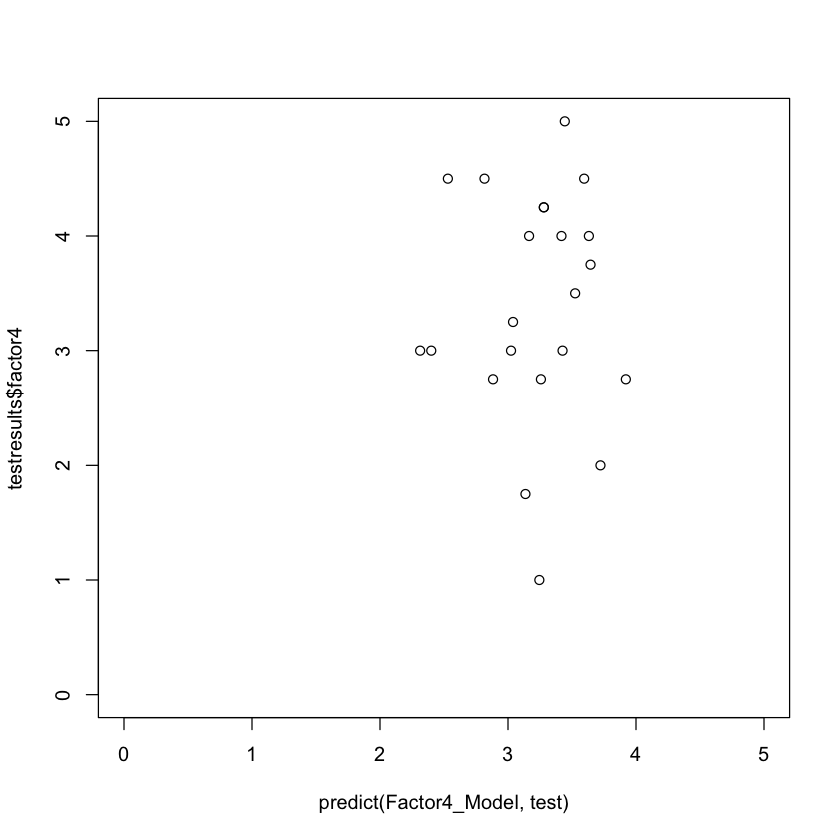

In [27]:
summary(Factor4_Model)

plot(predict(Factor4_Model,test),testresults$factor4,xlim = c(0,5),ylim = c(0,5))

#### Factor 5


Call:
lm(formula = factor5 ~ Division + RAS + pctinvalid + Team + Rank + 
    EducLv + AgeGroups + Sex + EthnicGrp + Citizenship + YearsofServiceGroups, 
    data = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.91547 -0.37014  0.00278  0.35551  1.29780 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)   
(Intercept)           4.182788   1.506400   2.777  0.00781 **
Division              0.369981   0.192791   1.919  0.06093 . 
RAS                  -0.074119   0.058066  -1.276  0.20793   
pctinvalid1.25        0.771568   1.078365   0.715  0.47777   
pctinvalid10          0.150292   0.909039   0.165  0.86938   
pctinvalid2.5         1.008527   0.977224   1.032  0.30723   
pctinvalid3.75        0.858358   1.041786   0.824  0.41405   
pctinvalid5          -0.035844   0.949521  -0.038  0.97004   
pctinvalid6.25        0.395239   0.941427   0.420  0.67648   
pctinvalid7.5         0.060456   0.939782   0.064  0.94897   
pctinvalid8.75        0.15

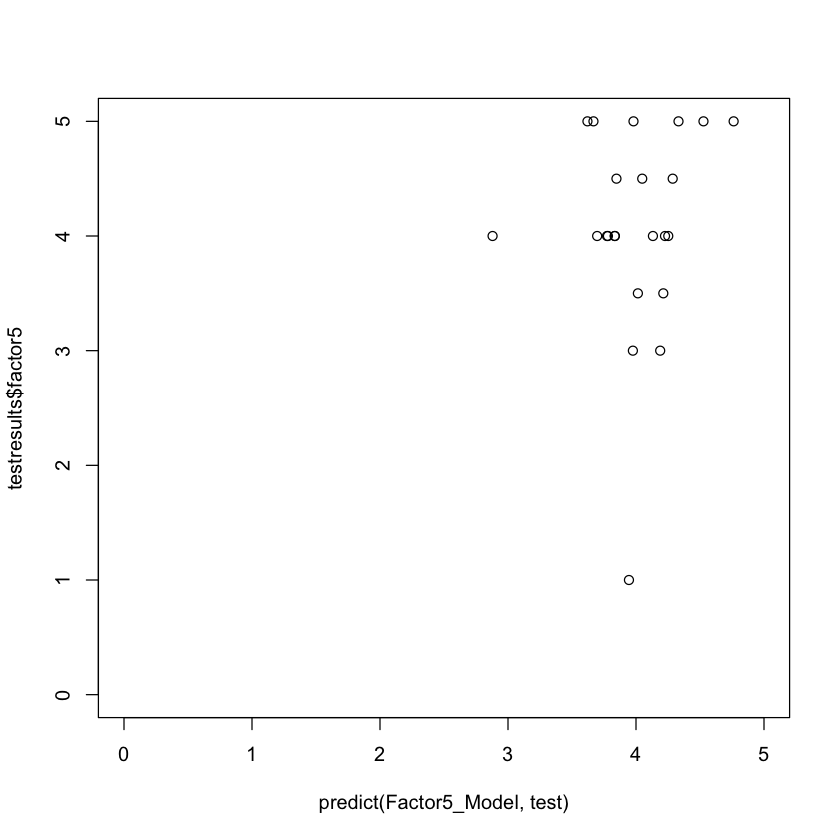

In [28]:
summary(Factor5_Model)

plot(predict(Factor5_Model,test),testresults$factor5,xlim = c(0,5),ylim = c(0,5))

#### Factor 6


Call:
lm(formula = factor6 ~ Division + RAS + pctinvalid + Team + Rank + 
    EducLv + AgeGroups + Sex + EthnicGrp + Citizenship + YearsofServiceGroups, 
    data = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.41339 -0.25905  0.08011  0.33624  1.10152 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)   
(Intercept)           3.029815   1.372077   2.208  0.03204 * 
Division              0.317179   0.175600   1.806  0.07715 . 
RAS                   0.009938   0.052888   0.188  0.85174   
pctinvalid1.25        0.823714   0.982209   0.839  0.40583   
pctinvalid10          1.642745   0.827982   1.984  0.05299 . 
pctinvalid2.5         2.556561   0.890087   2.872  0.00605 **
pctinvalid3.75        1.960333   0.948892   2.066  0.04426 * 
pctinvalid5           1.255719   0.864854   1.452  0.15302   
pctinvalid6.25        1.609355   0.857482   1.877  0.06663 . 
pctinvalid7.5         1.801989   0.855983   2.105  0.04054 * 
pctinvalid8.75        1.00

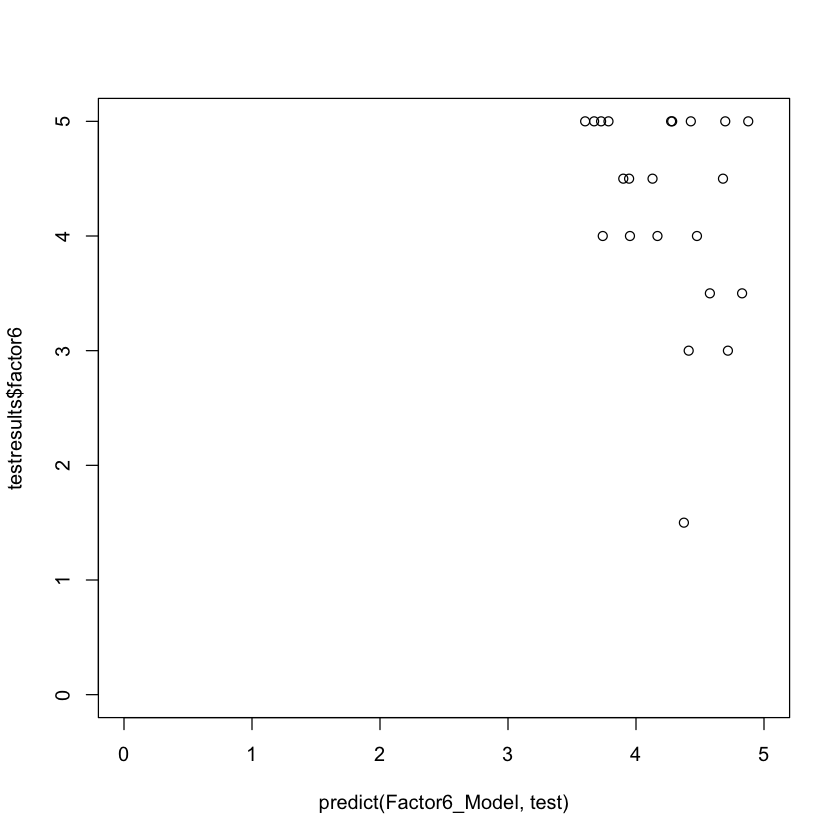

In [29]:
summary(Factor6_Model)

plot(predict(Factor6_Model,test),testresults$factor6,xlim = c(0,5),ylim = c(0,5))

#### Overall Factors


Call:
lm(formula = factoroverall ~ Division + RAS + pctinvalid + Team + 
    Rank + EducLv + AgeGroups + Sex + EthnicGrp + Citizenship + 
    YearsofServiceGroups, data = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.14330 -0.20745 -0.02701  0.32358  0.87896 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)           3.6158192  0.9507503   3.803 0.000404 ***
Division              0.2271472  0.1216783   1.867 0.068046 .  
RAS                   0.0001131  0.0366478   0.003 0.997550    
pctinvalid1.25        0.0915744  0.6805999   0.135 0.893531    
pctinvalid10          0.6084261  0.5737317   1.060 0.294237    
pctinvalid2.5         1.4807698  0.6167655   2.401 0.020280 *  
pctinvalid3.75        0.9125960  0.6575132   1.388 0.171561    
pctinvalid5           0.4194612  0.5992812   0.700 0.487343    
pctinvalid6.25        0.6234023  0.5941726   1.049 0.299343    
pctinvalid7.5         0.7533901  0.5931344   1.270 0.210142   

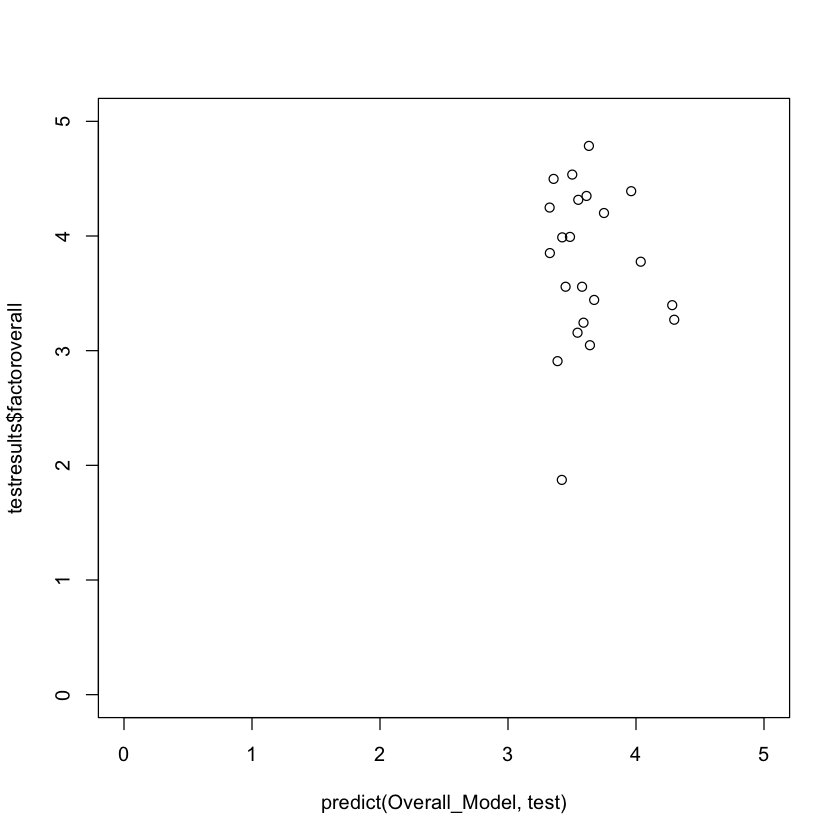

In [30]:
summary(Overall_Model)

plot(predict(Overall_Model,test),testresults$factoroverall,xlim = c(0,5),ylim = c(0,5))